# Исследование о показах фильмов в Российских кинотеатрах

## Описание проекта

Заказчик этого исследования — Министерство культуры Российской Федерации. 
Нужно изучить рынок российского кинопроката и выявить текущие тренды. Уделить внимание фильмам, которые получили государственную поддержку. Ответить на вопрос, насколько такие фильмы интересны зрителю. 
Работа будет с данными, опубликованными на портале открытых данных Министерства культуры. Набор данных содержит информацию о прокатных удостоверениях, сборах и государственной поддержке фильмов, а также информацию с сайта КиноПоиск. 

<a id="Задачи_исследования"></a>

## Задачи исследования

### [Этап 1. Загрузить и изучить данные](#Этап_1)
* [1.1) Откройте файлы с данными и объедините их в один датафрейм;](#Читаем_данные)
* [1.2) Объедините данные таким образом, чтобы все объекты из датасета mkrf_movies обязательно вошли в получившийся датафрейм.](#Объединяем) 

### [Этап 2. Предобработка данных](#Этап_2)
* [2.1) Проверьте типы данных в датафрейме и преобразуйте там, где это необходимо;](#Преобразование_типов)
* [2.2) Изучите пропуски в датафрейме. Объясните, почему заполнили пропуски определённым образом или почему не стали это делать;](#Пропуски)
* [2.3) Проверьте, есть ли в данных дубликаты. Опишите причины, которые могли повлиять на появление дублей;](#Дубликаты)
* [2.4) Изучите столбцы, которые содержат категориальные значения:](#Категории)
    * [2.4.1) Посмотрите, какая общая проблема встречается почти во всех категориальных столбцах;](#Проблема)
    * [2.4.2) Исправьте проблемные значения в поле type.](#type)
* [2.5) Изучите столбцы, которые хранят количественные значения. Проверьте, обнаружились ли в таких столбцах подозрительные данные. Как с такими данными лучше поступить?](#Цифры)
* [2.6) Добавьте новые столбцы:](#Столбцы) 
    * [2.6.1) Создайте столбец с информацией о годе проката. Выделите год из даты премьеры фильма;](#Столбцы)
    * [2.6.2) Создайте два столбца: с именем и фамилией главного режиссёра и основным жанром фильма. В столбцы войдут первые значения из списка режиссёров и жанров соответственно;](#Столбцы)
    * [2.6.3)Посчитайте, какую долю от общего бюджета фильма составляет государственная поддержка.](#Доля)


### [Этап 3. Проведите исследовательский анализ данных](#Этап_3)
* [3.1) Посмотрите, сколько фильмов выходило в прокат каждый год. Обратите внимание, что данные о прокате в кинотеатрах известны не для всех фильмов;](#Статистика_проката) 
* [3.2) Посчитайте, какую долю составляют фильмы с указанной информацией о прокате в кинотеатрах. Проанализируйте, как эта доля менялась по годам. Сделайте вывод о том, какой период полнее всего представлен в данных;](#Дoля)
* [3.3) Изучите, как менялась динамика проката по годам. В каком году сумма сборов была минимальной? А максимальной?;](#Динамика)
* [3.4) С помощью сводной таблицы посчитайте среднюю и медианную сумму сборов для каждого года. Сравните значения и сделайте выводы;](#mean_median)
* [3.5) Определите, влияет ли возрастное ограничение аудитории («6+», «12+», «16+», «18+» и т. д.) на сборы фильма в прокате в период с 2015 по 2019 год?;](#age_restriction) 
* [3.6) Фильмы с каким возрастным ограничением собрали больше всего денег в прокате? Меняется ли картина в зависимости от года? Если да, предположите, с чем это может быть связано.](#Top)

### [Этап 4. Исследуйте фильмы, которые получили государственную поддержку](#Этап_4)
* [4.1) На этом этапе нет конкретных инструкций и заданий — поищите интересные закономерности в данных. Посмотрите, сколько выделяют средств на поддержку кино. Проверьте, хорошо ли окупаются такие фильмы, какой у них рейтинг.](#Этап_4) 

### [Этап 5. Общий вывод](#Этап_5)

<a id="Описание_данных"></a>

## Описание данных

Таблица mkrf_movies содержит информацию из реестра прокатных удостоверений. У одного фильма может быть несколько прокатных удостоверений. 
* title — название фильма;
* puNumber — номер прокатного удостоверения;
* show_start_date — дата премьеры фильма;
* type — тип фильма;
* film_studio — студия-производитель;
* production_country — страна-производитель;
* director — режиссёр;
* producer — продюсер;
* age_restriction — возрастная категория;
* refundable_support — объём возвратных средств государственной поддержки;
* nonrefundable_support — объём невозвратных средств государственной поддержки;
* financing_source — источник государственного финансирования;
* budget — общий бюджет фильма;
* ratings — рейтинг фильма на КиноПоиске;
* genres — жанр фильма.

Обратите внимание, что столбец budget уже включает в себя полный объём государственной поддержки. Данные в этом столбце указаны только для тех фильмов, которые получили государственную поддержку. 

Таблица mkrf_shows содержит сведения о показах фильмов в российских кинотеатрах.
* puNumber — номер прокатного удостоверения;
* box_office — сборы в рублях.

[Вернуться к содержанию](#Содержание)


<a id="Этап_1"></a>
<a id="Подключение_библиотек"></a>

## Этап 1: Загрузить и изучить данные 
### Подключение библиотек

[Вернуться к задачам исследования](#Задачи_исследования)

In [96]:
import pandas as pd                                           # Библиотека для работы с данными, предоставляет функции и структуры данных, такие как DataFrame и Series.
import numpy as np                                            # Фундаментальная библиотека для научных вычислений с поддержкой многомерных массивов и матриц.
import seaborn as sns                                         # Библиотека для визуализации данных, основанная на Matplotlib.
from matplotlib import pyplot as plt                          # Библиотека для создания статических, анимированных и взаимодействующих визуализаций данных.
from matplotlib.ticker import FuncFormatter                   # Классы ScalarFormatter и AutoFormatter для настройки форматирования осей на графиках.
from IPython.display import display                           # Библиотека для отображения результатов в блокнотах Jupyter.
import re                                                     # Модуль для работы с регулярными выражениями.
import warnings                                               # Модуль для управления предупреждениями.

# Настрйоки отображения
# Устанавливаем формат отображения чисел с двумя знаками после запятой 
pd.options.display.float_format = '{:.2f}'.format

# Устанавливает фильтр предупреждений
warnings.filterwarnings("ignore")

<a id="Читаем_данные"></a>
<a id="Изучение_данных"></a>

## Изучение данных из файлов
[Вернуться к задачам исследования](#Задачи_исследования)

In [97]:
try:
    df_movies = pd.read_csv('/Users/Edward/Code/DS+/csv/mkrf_movies.csv', sep = ',')
    df_shows = pd.read_csv('/Users/Edward/Code/DS+/csv/mkrf_shows.csv', sep = ',')
except:
    df_movies = pd.read_csv('/datasets/mkrf_movies.csv', sep = ',')
    df_shows = pd.read_csv('/datasets/mkrf_shows.csv', sep = ',')

In [98]:
df_movies.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7486 entries, 0 to 7485
Data columns (total 15 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   title                  7486 non-null   object 
 1   puNumber               7486 non-null   object 
 2   show_start_date        7486 non-null   object 
 3   type                   7486 non-null   object 
 4   film_studio            7468 non-null   object 
 5   production_country     7484 non-null   object 
 6   director               7477 non-null   object 
 7   producer               6918 non-null   object 
 8   age_restriction        7486 non-null   object 
 9   refundable_support     332 non-null    float64
 10  nonrefundable_support  332 non-null    float64
 11  budget                 332 non-null    float64
 12  financing_source       332 non-null    object 
 13  ratings                6519 non-null   object 
 14  genres                 6510 non-null   object 
dtypes: f

In [99]:
df_movies.head()

,title,puNumber,show_start_date,type,film_studio,production_country,director,producer,age_restriction,refundable_support,nonrefundable_support,budget,financing_source,ratings,genres
0,Открытый простор,221048915,2015-11-27T12:00:00.000Z,Художественный,"Тачстоун Пикчерз, Кобальт Пикчерз, Бикон Пикче...",США,Кевин Костнер,"Дэвид Валдес, Кевин Костнер, Джейк Эбертс",«18+» - запрещено для детей,NaN,NaN,NaN,NaN,7.2,"боевик,драма,мелодрама"
1,Особо важное задание,111013716,2016-09-13T12:00:00.000Z,Художественный,"Киностудия ""Мосфильм""",СССР,Е.Матвеев,NaN,«6+» - для детей старше 6 лет,NaN,NaN,NaN,NaN,6.6,"драма,военный"
2,Особо опасен,221038416,2016-10-10T12:00:00.000Z,Художественный,"Юниверсал Пикчерз, Кикстарт Продакшнз, Марк Пл...",США,Тимур Бекмамбетов,"Джим Лемли, Джейсон Нетер, Марк Е.Платт, Яйн Смит",«18+» - запрещено для детей,NaN,NaN,NaN,NaN,6.8,"фантастика,боевик,триллер"
3,Особо опасен,221026916,2016-06-10T12:00:00.000Z,Художественный,"Юниверсал Пикчерз, Кикстарт Продакшнз, Марк Пл...",США,Тимур Бекмамбетов,"Джим Лемли, Джейсон Нетер, Марк Е.Платт, Яйн Смит",«18+» - запрещено для детей,NaN,NaN,NaN,NaN,6.8,"фантастика,боевик,триллер"
4,Особо опасен,221030815,2015-07-29T12:00:00.000Z,Художественный,"Юниверсал Пикчерз, Кикстарт Продакшнз, Марк Пл...",США,Тимур Бекмамбетов,"Джим Лемли, Джейсон Нетер, Марк Е.Платт, Яйн Смит",«18+» - запрещено для детей,NaN,NaN,NaN,NaN,6.8,"фантастика,боевик,триллер"


In [100]:
df_shows.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3158 entries, 0 to 3157
Data columns (total 2 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   puNumber    3158 non-null   int64  
 1   box_office  3158 non-null   float64
dtypes: float64(1), int64(1)
memory usage: 49.5 KB


In [101]:
df_shows.head()

,puNumber,box_office
0,111000113,2450.00
1,111000115,61040.00
2,111000116,153030013.40
3,111000117,12260956.00
4,111000118,163684057.79


Приведем 'puNumber' в df_shows к типу object, так как это категориальныей тип

In [102]:
df_shows['puNumber'] = df_shows['puNumber'].astype(str)
df_shows.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3158 entries, 0 to 3157
Data columns (total 2 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   puNumber    3158 non-null   object 
 1   box_office  3158 non-null   float64
dtypes: float64(1), object(1)
memory usage: 49.5+ KB


<a id="Объединяем"></a>

Теперь склеим датасеты, согласно задачам исследования (Этап 1.2)

[Вернуться к задачам исследования](#Задачи_исследования)

In [103]:
# Объединение df_movies и df_shows по столбцу 'puNumber' с использованием метода merge
# Результат сохраняется в переменной df
df = df_movies.merge(df_shows[['puNumber', 'box_office']], how='left', on='puNumber')

# Замена пропущенных значений (NaN) в столбце 'box_office' на 0
df['box_office'] = df['box_office'].fillna(0)
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 7486 entries, 0 to 7485
Data columns (total 16 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   title                  7486 non-null   object 
 1   puNumber               7486 non-null   object 
 2   show_start_date        7486 non-null   object 
 3   type                   7486 non-null   object 
 4   film_studio            7468 non-null   object 
 5   production_country     7484 non-null   object 
 6   director               7477 non-null   object 
 7   producer               6918 non-null   object 
 8   age_restriction        7486 non-null   object 
 9   refundable_support     332 non-null    float64
 10  nonrefundable_support  332 non-null    float64
 11  budget                 332 non-null    float64
 12  financing_source       332 non-null    object 
 13  ratings                6519 non-null   object 
 14  genres                 6510 non-null   object 
 15  box_

Проверим, что все объекты из датасета mkrf_movies обязательно вошли в получившийся датафрейм

In [104]:
if len(df) == len(df_movies):
    print("Все объекты из mkrf_movies вошли в df")
else:
    print("Не все объекты из mkrf_movies вошли в df")

Все объекты из mkrf_movies вошли в df


<a id="Вывод_первого_этапа"></a>

## Вывод

Проблемы, которые нужно решить и понять: 
1) некорректные типы данных;
2) столбцы не соответствуют удобному и единообразному правилу названия;
3) прыгающий регистр в названии столбцов;
4) нелогичная группировка столбцов между собой;
5) много пропущенных значений;
6) Объеденили два дата сета: "df_movies" и "df_shows" в "df", проверка показала, что потеря данных не произошла.

<a id="Этап_2"></a>
<a id="Предобработка_данных"></a>
<a id="Преобразование_типов"></a>

## Этап 2. Предобработка данных
### Преобразуем типы данных

[Вернуться к задачам исследования](#Задачи_исследования)

In [105]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 7486 entries, 0 to 7485
Data columns (total 16 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   title                  7486 non-null   object 
 1   puNumber               7486 non-null   object 
 2   show_start_date        7486 non-null   object 
 3   type                   7486 non-null   object 
 4   film_studio            7468 non-null   object 
 5   production_country     7484 non-null   object 
 6   director               7477 non-null   object 
 7   producer               6918 non-null   object 
 8   age_restriction        7486 non-null   object 
 9   refundable_support     332 non-null    float64
 10  nonrefundable_support  332 non-null    float64
 11  budget                 332 non-null    float64
 12  financing_source       332 non-null    object 
 13  ratings                6519 non-null   object 
 14  genres                 6510 non-null   object 
 15  box_

In [106]:
df.head(1)

,title,puNumber,show_start_date,type,film_studio,production_country,director,producer,age_restriction,refundable_support,nonrefundable_support,budget,financing_source,ratings,genres,box_office
0,Открытый простор,221048915,2015-11-27T12:00:00.000Z,Художественный,"Тачстоун Пикчерз, Кобальт Пикчерз, Бикон Пикче...",США,Кевин Костнер,"Дэвид Валдес, Кевин Костнер, Джейк Эбертс",«18+» - запрещено для детей,NaN,NaN,NaN,NaN,7.2,"боевик,драма,мелодрама",0.00


In [107]:
# Приводим колонки к типу datetime
df['show_start_date']  = pd.to_datetime(df['show_start_date'])
df['show_start_date'] = df['show_start_date'].dt.strftime("%Y-%m-%d %H:%M:%S")
df['show_start_date']  = pd.to_datetime(df['show_start_date'])

In [109]:
# Изменим логику столбца 'age_restriction', укажем с какого возраста можно смотреть фильм
def update_age_restriction(value):
    """
    Обновляет значение столбца 'age_restriction' путем извлечения числа из текста,
    удаления текста.

    Аргументы:
    - value: Значение из столбца 'age_restriction'.

    Возвращает:
    - Обновленное значение 'age_restriction' или исходное значение, если не удалось выполнить обновление.
    """

    if isinstance(value, str):
        # Используем регулярное выражение для поиска числа в тексте
        match = re.search(r'\d+', value)
        if match:
            # Извлекаем найденное число, преобразуем в целое число
            age = int(match.group())
            return str(age)
    return value

# Применяем функцию к столбцу 'age_restriction'
df['age_restriction'] = df['age_restriction'].apply(update_age_restriction).astype(int)

In [110]:
# # Приводим колонки к типу float
def convert_rating(value):
    """
    Конвертирует строковое значение рейтинга в число с плавающей запятой, удаляя символ процента (%).

    Аргументы:
    - value: Значение из столбца 'ratings'.

    Возвращает:
    - Преобразованное значение в виде числа с плавающей запятой или None, если преобразование не удалось.
    """

    if isinstance(value, str):
        # Удаляем символ процента из строки
        value = value.rstrip('%')
    try:
        # Преобразуем значение в число с плавающей запятой
        return float(value)
    except ValueError:
        # Если преобразование не удалось, возвращаем None
        return None

# Применяем функцию к столбцу 'ratings'
df['ratings'] = df['ratings'].apply(convert_rating)
# Заменяем все NaN на нулевой рейтинг
df['ratings'] = df['ratings'].fillna(0)
# Удаляем значения в колонке 'ratings', которые больше 10.00
df = df[df['ratings'] <= 10.00]

In [111]:
df.loc[df['ratings'] > 10]

,title,puNumber,show_start_date,type,film_studio,production_country,director,producer,age_restriction,refundable_support,nonrefundable_support,budget,financing_source,ratings,genres,box_office


In [114]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 7457 entries, 0 to 7485
Data columns (total 16 columns):
 #   Column                 Non-Null Count  Dtype         
---  ------                 --------------  -----         
 0   title                  7457 non-null   object        
 1   puNumber               7457 non-null   object        
 2   show_start_date        7457 non-null   datetime64[ns]
 3   type                   7457 non-null   object        
 4   film_studio            7439 non-null   object        
 5   production_country     7455 non-null   object        
 6   director               7448 non-null   object        
 7   producer               6889 non-null   object        
 8   age_restriction        7457 non-null   int64         
 9   refundable_support     330 non-null    float64       
 10  nonrefundable_support  330 non-null    float64       
 11  budget                 330 non-null    float64       
 12  financing_source       330 non-null    object        
 13  rat

In [115]:
# Переименуем столбец согласно правилам написания
df.rename(columns={'puNumber':'number'}, inplace=True)

In [116]:
# Изменим группировку столбцов между собой 
def reorder_columns(dataframe):
    """
    Переставляет столбцы в DataFrame в определенной последовательности.

    Параметры:
        dataframe (pandas.DataFrame): DataFrame, для которого нужно переставить столбцы.

    Возвращаемое значение:
        pandas.DataFrame: DataFrame с переставленными столбцами.
    """

    # Определение новой последовательности столбцов
    column_list = ['title', 
                   'number', 
                   'show_start_date', 
                   'type', 'film_studio', 
                   'production_country', 
                   'director', 
                   'producer', 
                   'genres', 
                   'age_restriction', 
                   'ratings', 
                   'budget', 
                   'refundable_support', 
                   'nonrefundable_support', 
                   'financing_source',
                   'box_office']


    # Переупорядочивание столбцов в DataFrame
    df = dataframe[column_list]
    return dataframe

df = reorder_columns(df)
df.head(1)

,title,number,show_start_date,type,film_studio,production_country,director,producer,age_restriction,refundable_support,nonrefundable_support,budget,financing_source,ratings,genres,box_office
0,Открытый простор,221048915,2015-11-27 12:00:00,Художественный,"Тачстоун Пикчерз, Кобальт Пикчерз, Бикон Пикче...",США,Кевин Костнер,"Дэвид Валдес, Кевин Костнер, Джейк Эбертс",18,NaN,NaN,NaN,NaN,7.20,"боевик,драма,мелодрама",0.00


<a id="Пропуски"></a>

Поработаем с пропущенными значениями


[Вернуться к задачам исследования](#Задачи_исследования)

In [118]:
df.isnull().sum().sort_values()

title                       0
number                      0
show_start_date             0
type                        0
age_restriction             0
ratings                     0
box_office                  0
production_country          2
director                    9
film_studio                18
producer                  568
genres                    973
refundable_support       7127
nonrefundable_support    7127
budget                   7127
financing_source         7127
dtype: int64

In [120]:
# Посмотрим теперь в процентах
display(pd.DataFrame(round((df.isna().mean()*100),2), columns=['NaNs, %'])
        .style.format( '{:.2f}').background_gradient('coolwarm'))

,"NaNs, %"
title,0.00
number,0.00
show_start_date,0.00
type,0.00
film_studio,0.24
production_country,0.03
director,0.12
producer,7.62
age_restriction,0.00
refundable_support,95.57


Так как данные были предоставлены с официального сайта Министерства Культуры Российской Федерации, то мы можем утверждать, что все проекты, которые были профинансированы государством, присутствуют в дата сете, а значения NaN указывает на то, что финансовая поддержка со стороны государства не оказавалось. Следовательно, присвоим всем значениям NaN значение 'Отсутствует'. Так мы сможем в дальнейшем разделить данные на две категории фильмов.

In [121]:
df['financing_source'].fillna('Отсутствует', inplace = True)

Значения в столбцах 'refundable_support', 'nonrefundable_support' зависят от значения в столбце 'financing_source', если была гос.поддержка, значит должен быть указан объем возвратных/невозвратных средств, иначе просто ноль.

В столбце 'budget' указаны значения только для фильмов, которые были профинансированы государством, для остальных фильмов стоит значение NaN. Все в нули без логики мы поставить не можем, так как любой фильм имеет определенный бюджет. Поэтому пойдем по токой логике: пускай ноль в бюджете будет означать значение False (0 = False), где под False мы будем подразумевать, что данных нет. Это нам упростит анализ.

In [122]:

df.loc[df['financing_source'] == 'Отсутствует', ['refundable_support', 'nonrefundable_support', 'budget']] = 0

В столбце "producer" содержится 7.37% пропущенных значений, и этот столбец относится к категориальным данным. Для обработки пропущенных значений можно заменить все NaN на "Неизвестно", сохраняя тем самым общую логику и смысл данных. Остальные признаки имеют долю пропущенных значений менее 1% и не требуют дополнительной обработки или внимания. 

In [123]:
df[df['producer'].isnull()].sample(5)

,title,number,show_start_date,type,film_studio,production_country,director,producer,age_restriction,refundable_support,nonrefundable_support,budget,financing_source,ratings,genres,box_office
2421,Авария - дочь мента,111023814,2014-12-24 12:00:00,Художественный,"Киностудия ""Мосфильм""",СССР,М.Туманишвили,NaN,16,0.00,0.00,0.00,Отсутствует,7.20,драма,5945.00
7402,Охота на единорога,111020119,2019-12-01 12:00:00,Художественный,Свердловская киностудия,СССР,В.Лаптев,NaN,12,0.00,0.00,0.00,Отсутствует,7.20,"драма,военный",0.00
3195,Мачеха,111002316,2016-02-12 12:00:00,Художественный,"Киностудия ""Мосфильм""",СССР,О.Бондарев,NaN,0,0.00,0.00,0.00,Отсутствует,5.30,драма,0.00
7131,Разум и искусство,126002819,2019-08-04 12:00:00,Прочие,Циркл Тайм,Великобритания,Амели Равалек,NaN,16,0.00,0.00,0.00,Отсутствует,0.00,NaN,1524797.50
2326,Опасные друзья,111018814,2014-12-01 12:00:00,Художественный,"Киностудия ""Мосфильм""",СССР,В.Шамшурин,NaN,12,0.00,0.00,0.00,Отсутствует,6.30,"драма,криминал",0.00


In [124]:
df['producer'].fillna('Неизвестно', inplace = True)

<a id="Дубликаты"></a>

### Чекним дубликаты

[Вернуться к задачам исследования](#Задачи_исследования)

In [125]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 7457 entries, 0 to 7485
Data columns (total 16 columns):
 #   Column                 Non-Null Count  Dtype         
---  ------                 --------------  -----         
 0   title                  7457 non-null   object        
 1   number                 7457 non-null   object        
 2   show_start_date        7457 non-null   datetime64[ns]
 3   type                   7457 non-null   object        
 4   film_studio            7439 non-null   object        
 5   production_country     7455 non-null   object        
 6   director               7448 non-null   object        
 7   producer               7457 non-null   object        
 8   age_restriction        7457 non-null   int64         
 9   refundable_support     7457 non-null   float64       
 10  nonrefundable_support  7457 non-null   float64       
 11  budget                 7457 non-null   float64       
 12  financing_source       7457 non-null   object        
 13  rat

In [126]:
# Явных дублей нет
df.duplicated().sum()

0

Проверим неявные дубли, что в датасете должно быть уникальным? Очевидно, что номер прокатного удостоверения и название фильма

In [127]:
df['title'].duplicated().sum()

714

In [128]:
df['number'].duplicated().sum()

2

In [129]:
df.head()

,title,number,show_start_date,type,film_studio,production_country,director,producer,age_restriction,refundable_support,nonrefundable_support,budget,financing_source,ratings,genres,box_office
0,Открытый простор,221048915,2015-11-27 12:00:00,Художественный,"Тачстоун Пикчерз, Кобальт Пикчерз, Бикон Пикче...",США,Кевин Костнер,"Дэвид Валдес, Кевин Костнер, Джейк Эбертс",18,0.00,0.00,0.00,Отсутствует,7.20,"боевик,драма,мелодрама",0.00
1,Особо важное задание,111013716,2016-09-13 12:00:00,Художественный,"Киностудия ""Мосфильм""",СССР,Е.Матвеев,Неизвестно,6,0.00,0.00,0.00,Отсутствует,6.60,"драма,военный",0.00
2,Особо опасен,221038416,2016-10-10 12:00:00,Художественный,"Юниверсал Пикчерз, Кикстарт Продакшнз, Марк Пл...",США,Тимур Бекмамбетов,"Джим Лемли, Джейсон Нетер, Марк Е.Платт, Яйн Смит",18,0.00,0.00,0.00,Отсутствует,6.80,"фантастика,боевик,триллер",0.00
3,Особо опасен,221026916,2016-06-10 12:00:00,Художественный,"Юниверсал Пикчерз, Кикстарт Продакшнз, Марк Пл...",США,Тимур Бекмамбетов,"Джим Лемли, Джейсон Нетер, Марк Е.Платт, Яйн Смит",18,0.00,0.00,0.00,Отсутствует,6.80,"фантастика,боевик,триллер",0.00
4,Особо опасен,221030815,2015-07-29 12:00:00,Художественный,"Юниверсал Пикчерз, Кикстарт Продакшнз, Марк Пл...",США,Тимур Бекмамбетов,"Джим Лемли, Джейсон Нетер, Марк Е.Платт, Яйн Смит",18,0.00,0.00,0.00,Отсутствует,6.80,"фантастика,боевик,триллер",0.00


In [130]:
# Дропним дубли
df.drop_duplicates(subset='number', inplace=True)
display(df['number'].duplicated().sum())

0

<a id="Категории"></a>

### Проанализируем категориальные типы

[Вернуться к задачам исследования](#Задачи_исследования)

In [132]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 7455 entries, 0 to 7485
Data columns (total 16 columns):
 #   Column                 Non-Null Count  Dtype         
---  ------                 --------------  -----         
 0   title                  7455 non-null   object        
 1   number                 7455 non-null   object        
 2   show_start_date        7455 non-null   datetime64[ns]
 3   type                   7455 non-null   object        
 4   film_studio            7437 non-null   object        
 5   production_country     7453 non-null   object        
 6   director               7446 non-null   object        
 7   producer               7455 non-null   object        
 8   age_restriction        7455 non-null   int64         
 9   refundable_support     7455 non-null   float64       
 10  nonrefundable_support  7455 non-null   float64       
 11  budget                 7455 non-null   float64       
 12  financing_source       7455 non-null   object        
 13  rat

In [133]:
df.head(1)

,title,number,show_start_date,type,film_studio,production_country,director,producer,age_restriction,refundable_support,nonrefundable_support,budget,financing_source,ratings,genres,box_office
0,Открытый простор,221048915,2015-11-27 12:00:00,Художественный,"Тачстоун Пикчерз, Кобальт Пикчерз, Бикон Пикче...",США,Кевин Костнер,"Дэвид Валдес, Кевин Костнер, Джейк Эбертс",18,0.00,0.00,0.00,Отсутствует,7.20,"боевик,драма,мелодрама",0.00


In [134]:
# Получение списка уникальных значений из колонки 'title'
df['title'].unique().tolist()


['Открытый простор',
 'Особо важное задание',
 'Особо опасен',
 'Остановился поезд',
 'Любовь и голуби',
 'Любовь и сигареты',
 'Отпетые мошенники.',
 'Отпуск за свой счет',
 'Превосходство Борна /По одноименной новелле Роберта Ладлэма/',
 'Ответный ход',
 'Малышка на миллион /По мотивам рассказов Ф.Х.Тула из сборника "Клейма от канатов"/',
 'Преданный садовник',
 'Отель /По мотивам пьесы Джона Уэбстера/',
 'Председатель',
 'Осенний марафон',
 'Осень',
 'Неподдающиеся',
 'Неподсуден',
 'Незабываемый 1919-й год',
 'Незаконченная жизнь',
 'Операция "Ы" и другие приключения Шурика',
 'Неизвестные страницы из жизни разведчика',
 'Неисправимый лгун',
 'Призрак замка Моррисвиль',
 'Оружейный барон',
 'Отставной козы барабанщик',
 'Паршивая овца',
 'Плюмбум, или Опасная игра',
 'Первое свидание',
 'Охота на лис.',
 'Пиноккио 3000',
 'Перелом',
 'Мисс Поттер',
 'Миссис Хендерсон представляет',
 'Планета КА-ПЭКС /По мотивам романа Джин Бруэр/',
 'Молчи в тряпочку',
 'Мужики!..',
 'Автомобиль, с

In [135]:
# Получение списка уникальных значений из колонки 'type'
df['type'].unique().tolist()

['Художественный',
 'Анимационный',
 'Прочие',
 'Документальный',
 'Научно-популярный',
 ' Художественный',
 ' Анимационный',
 'Музыкально-развлекательный']

In [136]:
# Получение списка уникальных значений из колонки 'film_studio'
df['film_studio'].unique().tolist()

['Тачстоун Пикчерз, Кобальт Пикчерз, Бикон Пикчерз, Тиг Продакшнз',
 'Киностудия "Мосфильм"',
 'Юниверсал Пикчерз, Кикстарт Продакшнз, Марк Платт Продакшнз, Рилейтивити Медиа, Спайгласс Интертейнмент, Стилкин Филмз, Топ Кау Продакшнз',
 'Юнайтед Артистс, Грин Стрит Филмз, Айкон Интертейнмент Интернэшнл',
 'Пульсар Продюксьон, ТФ1 Фильм ',
 'Киностудия "Мосфильм", Телевидение ВНР',
 'Кеннеди/Маршал Компани, Юниверсал Пикчерз, Гипнотик, Калима Продакшнз, Лудлум Интертейнмент',
 'Уорнер Бразерс, Лейкшор Интертейнмент, Малпасо Продакшнз, Альберт С.Рудди Продакшнз',
 'Потбойлер Продакшнз, Эпсилон Моушн Пикчерз, Скайон Филмз Лимитед, ЮК Филм Каунсил',
 'Кэтлей, Отель Продакшнс, Мунстоун Интертейнмент, Рэд Маллет Продакшнс',
 'Инишиэл Интертейнмент Групп, Мирамакс Филмз, Персистент Интертейнмент, Революшн Студиос, Зе Лэдд Компани',
 'Фильмове Студио Баррандов',
 'Вэ И Пэ Медиенфондс 3, Асендант Пикчерз, Сатурн Филмз, Райзинг Стар, Эндгейм Интертейнмент, Интертейнмент Мэньюфэкчуринг Компани, Р

In [137]:
# Получение списка уникальных значений из колонки 'production_country'
df['production_country'].unique().tolist()

['США',
 'СССР',
 'Франция',
 'СССР, Венгрия',
 'Германия-Великобритания',
 'Великобритания - Италия',
 'Чехословакия',
 'США - Франция - Турция',
 'Новая Зеландия',
 'Канада - Франция - Испания',
 'США-Германия',
 'США - Великобритания',
 'Великобритания',
 'США - Германия',
 'Франция - Мексика - США',
 'Россия, Казахстан, США',
 'СССР, Швеция',
 'СССР, Франция, Англия, Куба, ГДР',
 'Германия',
 'Великобритания-США-Германия-КНР',
 'СССР, ЧССР, Западный Берлин, ПНР',
 'СССР, Италия',
 'Гонконг, КНР',
 'США - Франция',
 'США - Япония - Франция - Великобритания',
 'Гонконг - Сингапур - Таиланд - Великобритания',
 'США-Канада',
 'Франция - Италия - Великобритания - США',
 'Франция - США',
 'Ирландия-Великобритания-Германия',
 'Чехия',
 'США-Австралия',
 'СССР, Финляндия',
 'США-Франция-Великобритания-Австрия',
 'США - Бельгия',
 'США - Ирландия - Великобритания',
 'Великобритания - США',
 'Люксембург - Нидерланды - Испания - Великобритания - США - Италия',
 'Великобритания - Франция - США

In [138]:
# Получение списка уникальных значений из колонки 'director'
df['director'].unique().tolist()

['Кевин Костнер',
 'Е.Матвеев',
 'Тимур Бекмамбетов',
 'В.Абдрашитов',
 'В.Меньшов',
 'Джон Туртурро',
 'Эрик Беснард',
 'В.Титов',
 'Пол Грингросс',
 'М.Туманишвили',
 'Клинт Иствуд',
 'Фернанду Мейрелльеш',
 'Майк Фиггис',
 'А.Салтыков',
 'Г.Данелия',
 'А.Смирнов',
 'Ю.Чулюкин',
 'В.Краснопольский, В.Усков',
 'М.Чиаурели',
 'Лассе Халлстрем',
 'Л.Гайдай',
 'В.Чеботарев',
 'В.Азаров',
 'Боривой Земан',
 'Эндрю Никкол',
 'Г.Мыльников',
 'Джонатан Кинг',
 'И.Бабич',
 'Даниэль Робишо',
 'Грегори Хоблит',
 'Крис Нунан',
 'Стивен Фрирз',
 'Йэн Софтли',
 'Найл Джонсон',
 'Р.Быков',
 'Роб Райнер',
 'Бен Янгер',
 'Роб Маршалл',
 'Е.Ташков',
 'Н.Михалков',
 'Ю.Карасик',
 'А.Тарковский',
 'Джон Франкенхаймер',
 'Оливье Маршал',
 'С.Соловьев',
 'Иоахим Реннинг, Эспен Сандберг',
 'Ролан Быков',
 'Семен Туманов',
 'Питер Сигал',
 'М.Ромм',
 'Г.Полока',
 'Ю.Райзман',
 'Дрю Дэйуолт, Дэвид Шнейдер',
 'С.Самсонов',
 'Айрон Блейз, Роберт Уокер',
 'К.Шахназаров',
 'И.Гостев',
 'Т.Лукашевич',
 'В.Павлови

In [139]:
# Получение списка уникальных значений из колонки 'producer'
df['producer'].unique().tolist()


['Дэвид Валдес, Кевин Костнер, Джейк Эбертс',
 'Неизвестно',
 'Джим Лемли, Джейсон Нетер, Марк Е.Платт, Яйн Смит',
 'Джон Пенотти, Джон Туртурро',
 'Патрис Леду',
 'Патрик Кроули, Фрэнк Маршалл, Пол Сэндберг',
 'Клинт Иствуд, Том Розенберг, Альберт С.Рудди, Пол Хаггис',
 'Саймон Чэннинг Уильямс',
 'Этчи Стро, Анни Стюарт, Майк Фиггис',
 'Лесли Холлеран, Алан Лэдд мл., Келлиан Лэдд, Харви Вайнстайн',
 'Норман Голуайтли, Энди Грош, Николас Кейдж, Эндрю Никкол, Крис Робертс, Филипп Русле',
 'Филиппа Кемпбелл',
 'Луис Дюкью',
 'Чарльз Уэйнсток',
 'Дэвид Киршнер, Майк Медэвой, Арнольд Мессер, Корей Сэйнья, Дэвид Твайтс',
 'Норма Хейман, Боб Хоскинс',
 'Лоуренс Гордон, Роберт Коулсберри, Ллойд Левин',
 'Мэтью Пэйн, Джулия Пэло',
 'Тодд Блэк, Элан Грейсман, Джереми Левен, Роб Райнер, Эли Самаха',
 'Дженнифер Тодд, Сюзанн Тодд, Брэдли Дженкел, Энтони Катагас',
 'Стивен Спилберг, Люси Фишер, Дуглас Уик, Джон Де Люка, Гэри Барбер, Роджер Бирнбаум',
 'Франк Шоро, Сирил Кольбьё-Жюстен, Жан-Баптист

In [140]:
# Получение списка уникальных значений из колонки 'genres'
df['genres'].unique().tolist()

['боевик,драма,мелодрама',
 'драма,военный',
 'фантастика,боевик,триллер',
 'драма',
 'мелодрама,комедия',
 'мюзикл,мелодрама,комедия',
 'комедия,криминал',
 'боевик,триллер,детектив',
 'боевик,драма,приключения',
 'драма,спорт',
 'триллер,драма,мелодрама',
 'комедия,мелодрама',
 'драма,мелодрама,комедия',
 'драма,мелодрама',
 'драма,история',
 'драма,мелодрама,семейный',
 'комедия,мелодрама,криминал',
 'комедия',
 'боевик,драма,криминал',
 'драма,комедия',
 'ужасы,фантастика,комедия',
 'мультфильм,короткометражка,мелодрама',
 'драма,криминал',
 'мультфильм,фантастика,фэнтези',
 'триллер,драма,криминал',
 'драма,мелодрама,биография',
 'драма,комедия,военный',
 'фантастика,драма,детектив',
 'мюзикл,семейный',
 nan,
 'военный,приключения,драма',
 'документальный,драма',
 'драма,биография,история',
 'боевик,триллер,драма',
 'фэнтези,боевик',
 'боевик,комедия,криминал',
 'мюзикл,комедия,детский',
 'комедия,мелодрама,драма',
 'мультфильм,фэнтези,комедия',
 'комедия,история',
 'мелодрама',
 

<a id="Проблема"></a>
<a id="type"></a>
Общая проблема многих колонок с категориальными данными связана с тем, что они содержат очень много уникальных значений из-за того, что в них идет перечисления отдельных признаков.

Так же у многих столбцов с категориальными значениями наблюдается следующая проблема: лишние пробелы и специальные символы в начале и в конце предложения. В колонке 'production_country', можно заменить все тире на запятую, для единообразия. В колонке 'director' можно все привести к виду И.Иванов, место Иван Иванов, так как где-то имя указано, а где-то нет.

[Вернуться к содержанию](#Содержание)

In [141]:
def clean_column_values(df, column_name):
    """
    Функция для очистки значений в указанном столбце DataFrame от лишних пробелов в начале и конце строк,
    а также удаления специальных символов только в начале и конце строк.

    Параметры:
        - df (pandas.DataFrame): Исходный DataFrame.
        - column_name (str): Название столбца, значения которого требуется очистить.

    Возвращаемое значение:
        - df (pandas.DataFrame): DataFrame с очищенными значениями в указанном столбце.
    """

    # Удаление лишних пробелов в начале и конце строк
    df[column_name] = df[column_name].apply(lambda x: x.strip() if isinstance(x, str) else x)

    # Удаление специальных символов только в начале и конце строк
    df[column_name] = df[column_name].apply(lambda x: re.sub(r'^(.*?)(\W+)$', r'\1', x) if isinstance(x, str) else x)

    return df

columns = ['title', 'type', 'film_studio', 'production_country', 'director', 'producer', 'genres']

for i in columns:
    clean_column_values(df, i)

In [142]:
# Заменяем тире с пробелами на запятую с пробелом после нее
df['production_country'] = df['production_country'].str.replace(r'\s*-\s*', ', ')

# Заменяем любое количество пробелов после запятой на один пробел
df['production_country'] = df['production_country'].str.replace(r',\s+', ', ')

# Удаляем лишние пробелы перед запятой
df['production_country'] = df['production_country'].str.replace(r'\s+,', ',')

In [143]:
# Заменяем значения в столбце 'director' на новые значения согласно заданным условиям
df['director'] = df['director'].str.replace(r'^(\S)\S*\s+(\S+)$', r'\1.\2')

In [144]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 7455 entries, 0 to 7485
Data columns (total 16 columns):
 #   Column                 Non-Null Count  Dtype         
---  ------                 --------------  -----         
 0   title                  7455 non-null   object        
 1   number                 7455 non-null   object        
 2   show_start_date        7455 non-null   datetime64[ns]
 3   type                   7455 non-null   object        
 4   film_studio            7437 non-null   object        
 5   production_country     7453 non-null   object        
 6   director               7446 non-null   object        
 7   producer               7455 non-null   object        
 8   age_restriction        7455 non-null   int64         
 9   refundable_support     7455 non-null   float64       
 10  nonrefundable_support  7455 non-null   float64       
 11  budget                 7455 non-null   float64       
 12  financing_source       7455 non-null   object        
 13  rat

In [145]:
df.sample(5)

,title,number,show_start_date,type,film_studio,production_country,director,producer,age_restriction,refundable_support,nonrefundable_support,budget,financing_source,ratings,genres,box_office
7037,Русская невеста,121017319,2019-06-27 12:00:00,Художественный,"Рейджинг Интертейнмент, Миллмэн Продакшн, Эдж ...",США,М.С.Ойеда,"Филип Дэй, Джефф Миллер, Оксана Орлан",18,0.00,0.00,0.00,Отсутствует,4.70,"триллер,ужасы",391618.00
4261,Война Драконов,221100510,2010-08-31 12:00:00,Художественный,Асилум,США,М.Аткинс,"Пол Бэлс, Дэвид Римави, Дэвид Майкл Латт",12,0.00,0.00,0.00,Отсутствует,3.60,"ужасы,фэнтези,боевик",0.00
2468,Весь Этот Джем,111016515,2015-09-17 12:00:00,Художественный,"ООО ""Кинокомпания ""Спутник",Россия,А.Адраникян,"А.Адраникян, В.Горяинов",16,0.00,0.00,0.00,Отсутствует,5.00,"мелодрама,комедия",0.00
6435,Ральф против интернета,124004418,2018-11-22 12:00:00,Анимационный,"Уолт Дисней Анимейшн Студиос, Уолт Дисней Пикчерз",США,"Фил Джонстон, Рич Мур",Кларк Спенсер,6,0.00,0.00,0.00,Отсутствует,7.20,"мультфильм,комедия,приключения",739485125.85
54,50 первых поцелуев,221004416,2016-02-09 12:00:00,Художественный,"Коламбиа Пикчерз, Хэппи Медисон Продакшнз, Фла...",США,П.Сигал,"Бини Барнс, Джозеф Дрэйк, Джон Линсон",18,0.00,0.00,0.00,Отсутствует,7.30,"комедия,мелодрама,драма",0.00


<a id="Цифры"></a>

### Изучим количественные значения в столбцах

[Вернуться к задачам исследования](#Задачи_исследования)

### Сводная статистика

In [146]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
age_restriction,7455.00,13.01,5.61,0.00,12.00,16.00,16.00,18.00
refundable_support,7455.00,528370.22,5793017.17,0.00,0.00,0.00,0.00,180000000.00
nonrefundable_support,7455.00,2179341.16,16181631.76,0.00,0.00,0.00,0.00,400000000.00
budget,7455.00,5658726.15,47623830.87,0.00,0.00,0.00,0.00,2305074303.00
ratings,7455.00,5.64,2.41,0.00,5.40,6.40,7.10,9.20
box_office,7455.00,32324451.12,160818906.19,0.00,0.00,0.00,1086009.02,3073568690.79


### Функции для построения графиков ↓

In [147]:
def format_large_tick_values(tick_val, tick_pos):
    """
    Функция для форматирования больших значений меток оси x в сокращенном виде (например, "М" для миллионов, "Млрд" для миллиардов)
    """
    if tick_val >= 1e9:
        val = tick_val / 1e9
        return f'{val:.0f}Млрд'
    elif tick_val >= 1e6:
        val = tick_val / 1e6
        return f'{val:.0f}М'
    else:
        return tick_val

def show_boxplot_and_hist(col, bins=100, title='Распределение значений', xlabel=None, ylabel='Количество значений, шт', yformat='.d', ymultiplier=1e0):
    '''
    Функция построения гистограммы и диаграммы размаха для столбца col
    bins задаёт число корзин для гистограммы, по умолчанию 100
    title - задаёт название графика
    xlabel, ylabel - подписи к осям
    yformat - формат вывода чисел на оси y, по умолчанию '.d'
    ymultiplier - множитель для отображения значений на оси y, по умолчанию 1e0
    '''
    # Создаем графическое окно с двумя подграфиками (диаграмма размаха и гистограмма)
    fig, (ax_box, ax_hist) = plt.subplots(2, sharex=True, gridspec_kw={"height_ratios": (.15, .85)})

    # добавим графики
    sns.boxplot(x=col, ax=ax_box)
    sns.histplot(col, ax=ax_hist, bins=bins)

    # удалим подпись графика для boxplot, чтобы не дублировалась
    ax_box.set(xlabel='')

    # добавим подписи осей
    ax_hist.set(xlabel=xlabel, ylabel=ylabel)
    ax_hist.yaxis.set_major_formatter(FuncFormatter(lambda y, pos: ('%' + yformat) % (y * ymultiplier)))

    # увеличим интервал между метками оси x
    ax_hist.tick_params(axis='x', which='major', pad=10)

    # изменяем формат меток оси x для сокращенного представления чисел
    xticks = ax_hist.get_xticks()
    ax_hist.set_xticklabels([format_large_tick_values(xtick, None) for xtick in xticks])

    # добавим подпись графика
    plt.suptitle(title, y=0.95)

    # Возвращаем созданный график
    return fig


### Возрастная категория

count   7455.00
mean      13.01
std        5.61
min        0.00
25%       12.00
50%       16.00
75%       16.00
max       18.00
Name: age_restriction, dtype: float64

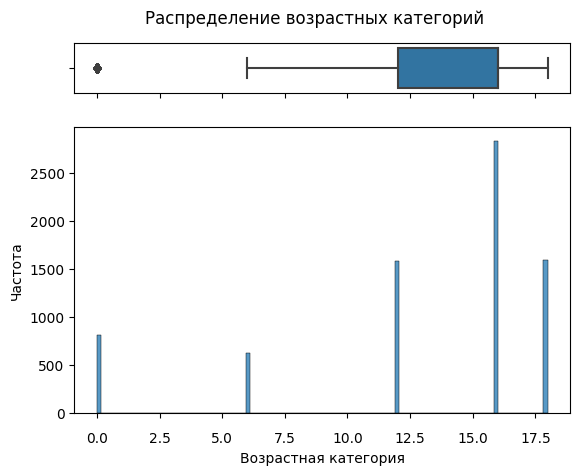

In [148]:
show_boxplot_and_hist(df['age_restriction'], 
                      title='Распределение возрастных категорий',
                      xlabel='Возрастная категория',
                      ylabel='Частота')
df['age_restriction'].describe()

### Все в пределах нормы

### Объём возвратных средств гос.поддержки

count        7455.00
mean       528370.22
std       5793017.17
min             0.00
25%             0.00
50%             0.00
75%             0.00
max     180000000.00
Name: refundable_support, dtype: float64

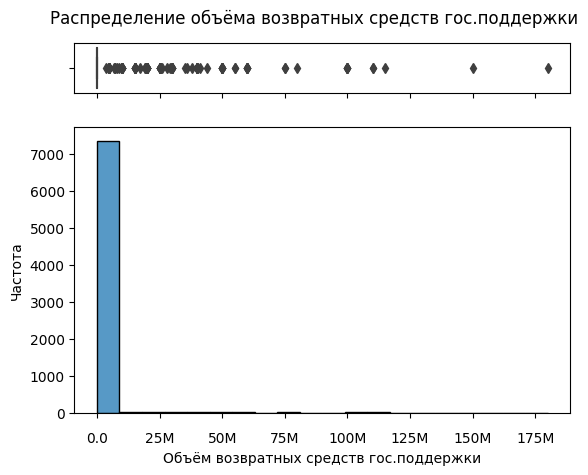

In [149]:
# Вызов функции show_boxplot_and_hist и передача данных df['refundable_support']
show_boxplot_and_hist(df['refundable_support'], 
                      bins=20,
                      title='Распределение объёма возвратных средств гос.поддержки',
                      xlabel='Объём возвратных средств гос.поддержки',
                      ylabel='Частота')
df['refundable_support'].describe()

Такие выбросы могут быть обусловлены тем, что большая часть фильмов не была профинансирована государством. Чтобы получить более репрезентативную картину и избежать искажений из-за нулевых значений, рекомендуется сосредоточиться на цифрах только для тех фильмов, которые получили государственную поддержку. Это позволит получить более точную статистику и провести анализ, учитывающий реальные финансовые показатели тех фильмов, которые получили государственную поддержку.

count         111.00
mean     35486486.49
std      31972875.36
min       3500000.00
25%      15000000.00
50%      25000000.00
75%      50000000.00
max     180000000.00
Name: refundable_support, dtype: float64

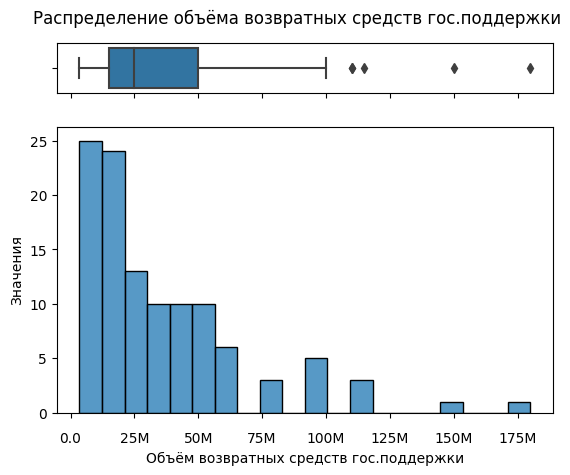

In [150]:
# Фильтрация значений, исключая нули
filtered_data = df[df['refundable_support'] != 0]

# Вызов функции show_boxplot_and_hist и передача отфильтрованных данных filtered_data['refundable_support']
show_boxplot_and_hist(filtered_data['refundable_support'], 
                      bins=20,
                      title='Распределение объёма возвратных средств гос.поддержки',
                      xlabel='Объём возвратных средств гос.поддержки',
                      ylabel='Значения')
filtered_data['refundable_support'].describe()


### Все в пределах нормы

### Объём невозвратных средств гос.поддержки

Так же сделаем для 'nonrefundable_support' (Объём невозвратных средств гос.поддержки)

count         321.00
mean     50613670.75
std      60334540.85
min       3000000.00
25%      25000000.00
50%      30000000.00
75%      45000000.00
max     400000000.00
Name: nonrefundable_support, dtype: float64

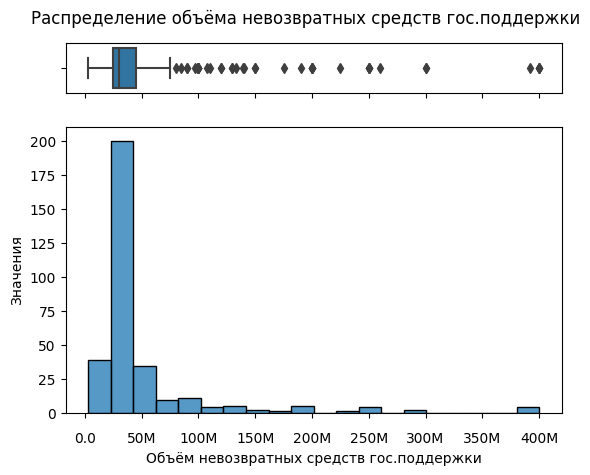

In [151]:
# Фильтрация значений, исключая нули
filtered_data_non = df[df['nonrefundable_support'] != 0]

# Вызов функции show_boxplot_and_hist и передача отфильтрованных данных filtered_data_non['nonrefundable_support']
show_boxplot_and_hist(filtered_data_non['nonrefundable_support'], 
                      bins=20,
                      title='Распределение объёма невозвратных средств гос.поддержки',
                      xlabel='Объём невозвратных средств гос.поддержки',
                      ylabel='Значения')
filtered_data_non['nonrefundable_support'].describe()


Что тут можно сказать? Много денег не вернулось, фильмы у нас по сравнению с Голливудом делать не умеют. Вот и выбросы такие.

### Бюджет

In [152]:
df.loc[df['budget'] == 0].head(5)

,title,number,show_start_date,type,film_studio,production_country,director,producer,age_restriction,refundable_support,nonrefundable_support,budget,financing_source,ratings,genres,box_office
0,Открытый простор,221048915,2015-11-27 12:00:00,Художественный,"Тачстоун Пикчерз, Кобальт Пикчерз, Бикон Пикче...",США,К.Костнер,"Дэвид Валдес, Кевин Костнер, Джейк Эбертс",18,0.00,0.00,0.00,Отсутствует,7.20,"боевик,драма,мелодрама",0.00
1,Особо важное задание,111013716,2016-09-13 12:00:00,Художественный,"Киностудия ""Мосфильм",СССР,Е.Матвеев,Неизвестно,6,0.00,0.00,0.00,Отсутствует,6.60,"драма,военный",0.00
2,Особо опасен,221038416,2016-10-10 12:00:00,Художественный,"Юниверсал Пикчерз, Кикстарт Продакшнз, Марк Пл...",США,Т.Бекмамбетов,"Джим Лемли, Джейсон Нетер, Марк Е.Платт, Яйн Смит",18,0.00,0.00,0.00,Отсутствует,6.80,"фантастика,боевик,триллер",0.00
3,Особо опасен,221026916,2016-06-10 12:00:00,Художественный,"Юниверсал Пикчерз, Кикстарт Продакшнз, Марк Пл...",США,Т.Бекмамбетов,"Джим Лемли, Джейсон Нетер, Марк Е.Платт, Яйн Смит",18,0.00,0.00,0.00,Отсутствует,6.80,"фантастика,боевик,триллер",0.00
4,Особо опасен,221030815,2015-07-29 12:00:00,Художественный,"Юниверсал Пикчерз, Кикстарт Продакшнз, Марк Пл...",США,Т.Бекмамбетов,"Джим Лемли, Джейсон Нетер, Марк Е.Платт, Яйн Смит",18,0.00,0.00,0.00,Отсутствует,6.80,"фантастика,боевик,триллер",0.00


In [153]:
df.loc[df['budget'] != 0].head(5)

,title,number,show_start_date,type,film_studio,production_country,director,producer,age_restriction,refundable_support,nonrefundable_support,budget,financing_source,ratings,genres,box_office
1281,Пока еще жива,111005313,2013-10-11 12:00:00,Художественный,"АНО содействия развитию кинематографии ""Ангел-...",Россия,А.Атанесян,"А.Атанесян, М.Бабаханов, Р.Бутко",16,0.00,26500000.00,79411900.00,Министерство культуры,8.10,"драма,мелодрама",365353.60
1448,Бесславные придурки,111003314,2014-03-28 12:00:00,Художественный,"ООО ""Компания ""АТК-Студио",Россия,А.Якимчук,А.Тютрюмов,12,0.00,26000000.00,37142857.00,Министерство культуры,0.00,NaN,28140.00
1498,Невидимки,111004213,2013-09-10 12:00:00,Художественный,"ООО ""Компания ""РЕАЛ-ДАКОТА",Россия,Р.С.Комаров,"Р.Давлетьяров, А.Котелевский, А.Олейников",12,0.00,107847945.00,176023490.00,Фонд кино,5.30,"комедия,фантастика",19957031.50
1524,БЕРЦЫ,111004314,2014-05-05 12:00:00,Художественный,"ООО ""Студия ""Пассажир",Россия,Е.Миндадзе (псевдоним Катя Шагалова,Л.Антонова,16,0.00,28000000.00,40574140.00,Министерство культуры,4.20,драма,55917.50
1792,Братья Ч,111004414,2014-04-23 12:00:00,Художественный,"ООО ""Студия ""Пассажир",Россия,М.Угаров,"А.Миндадзе, Л.Антонова",16,0.00,25000000.00,40015122.00,Министерство культуры,6.40,драма,232100.00


В дата фрейме бюджет указан только для фильмов которые финансировались гос.поддержкой, для остальных фильмов по нулям. Поэтому изучать цифры на основе всего дата фрейма, это все равно что анализировать нулевые значения, которые не предоставляют информацию о реальных бюджетах фильмов. Поэтому для получения точной и надежной информации о бюджетах фильмов следует ограничиться только теми записями, где бюджет указан отличным от нуля значением. Это позволит сосредоточиться на реальных финансовых показателях и сделать более точные выводы и анализ.

count          313.00
mean     134778924.84
std      191643121.41
min       15010000.00
25%       46154000.00
50%       74071918.00
75%      150008573.00
max     2305074303.00
Name: budget, dtype: float64

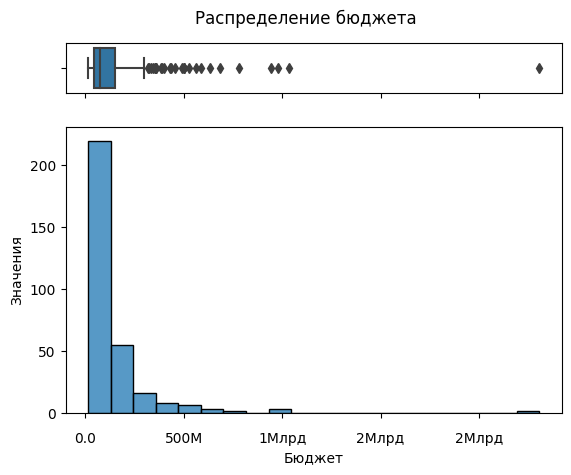

In [154]:
# Фильтрация значений, исключая нули
budget = df[df['budget'] != 0]

# Вызов функции show_boxplot_and_hist и передача отфильтрованных данных budget['budget']
show_boxplot_and_hist(budget['budget'], 
                      bins=20,
                      title='Распределение бюджета',
                      xlabel='Бюджет',
                      ylabel='Значения')
budget['budget'].describe()


В целом, анализ данных по бюджету фильмов позволяет сделать вывод о разнообразии финансовых аспектов в кинематографической индустрии. Кому то выделяют 14 миллионов, а кому то несколько миллиардов, вот такой и разброс.

### Рейтинг

count   7455.00
mean       5.64
std        2.41
min        0.00
25%        5.40
50%        6.40
75%        7.10
max        9.20
Name: ratings, dtype: float64

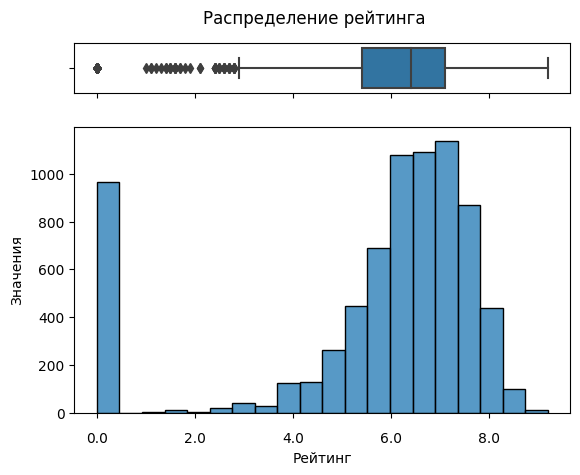

In [155]:
# Вызов функции show_boxplot_and_hist и передача данных df['ratings']
show_boxplot_and_hist(df['ratings'], 
                      bins=20,
                      title='Распределение рейтинга',
                      xlabel='Рейтинг',
                      ylabel='Значения')
df['ratings'].describe()


Разнообразный рейтинг, разнообразные значения

### Сборы в рублях

Продолжая рассуждение, можно заметить, что логика здесь схожа с предыдущими выводами. Фильмы, которые не получили государственную поддержку, обычно имеют нулевые сборы в рублях. Это объяснимо, поскольку отсутствие финансирования со стороны государства означает отсутствие прибыли со стороны фильма. Поэтому в дальнейшем анализе стоит сосредоточиться только на фильмах с ненулевыми значениями сборов в рублях. 

count         3120.00
mean      77236789.45
std      241533652.92
min             40.00
25%         102630.00
50%        2435268.35
75%       24740018.51
max     3073568690.79
Name: box_office, dtype: float64

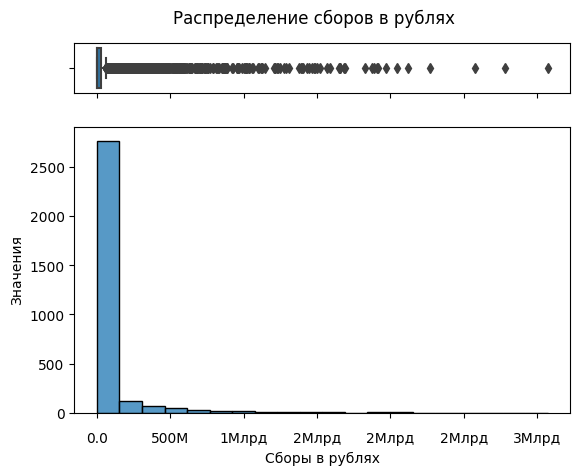

In [156]:
# Фильтрация значений, исключая нули
box_office = df[df['box_office'] != 0]

# Вызов функции show_boxplot_and_hist и передача отфильтрованных данных box_office['box_office']
show_boxplot_and_hist(box_office['box_office'], 
                      bins=20,
                      title='Распределение сборов в рублях',
                      xlabel='Сборы в рублях',
                      ylabel='Значения')
box_office['box_office'].describe()


Тут тоже все неоднозначно, можно утверждать, что один фильм собрал много денег, а другой мало, но от чего это зависит узнаем позже

### Вывод

Много выбросов в данных, но именно эти выбросы могут быть особенно интересными для анализа. Изучение таких случаев может помочь выявить особенности и факторы, которые позволили некоторым фильмам стать финансово успешными, несмотря на ограниченные ресурсы. Поэтому, несмотря на то, что выбросы могут выделяться на графиках и искажать общую картину, мы сохраняем эти данные для дальнейшего анализа и поиска интересных закономерностей.

Чистка выбросов может быть полезной в некоторых случаях, но в данном контексте они могут представлять ценную информацию для понимания разнообразия финансовых результатов в кинематографической индустрии

[Вернуться к задачам исследования](#Задачи_исследования)

<a id="Столбцы"></a>

### Добавление новых столбцов

[Вернуться к содержанию](#Содержание)

In [157]:
# Создадим столбец с информацией о годе проката 
df['year'] = df['show_start_date'].dt.year
df.head(1)

,title,number,show_start_date,type,film_studio,production_country,director,producer,age_restriction,refundable_support,nonrefundable_support,budget,financing_source,ratings,genres,box_office,year
0,Открытый простор,221048915,2015-11-27 12:00:00,Художественный,"Тачстоун Пикчерз, Кобальт Пикчерз, Бикон Пикче...",США,К.Костнер,"Дэвид Валдес, Кевин Костнер, Джейк Эбертс",18,0.00,0.00,0.00,Отсутствует,7.20,"боевик,драма,мелодрама",0.00,2015


In [158]:
# Создадим столбец с главным режисером
df['main_director'] = df['director'].str.split(',').str[0]
df.head(1)

,title,number,show_start_date,type,film_studio,production_country,director,producer,age_restriction,refundable_support,nonrefundable_support,budget,financing_source,ratings,genres,box_office,year,main_director
0,Открытый простор,221048915,2015-11-27 12:00:00,Художественный,"Тачстоун Пикчерз, Кобальт Пикчерз, Бикон Пикче...",США,К.Костнер,"Дэвид Валдес, Кевин Костнер, Джейк Эбертс",18,0.00,0.00,0.00,Отсутствует,7.20,"боевик,драма,мелодрама",0.00,2015,К.Костнер


In [159]:
# Создадим столбец с главным жанром
df['main_genres'] = df['genres'].str.split(',').str[0]
df.head(1)

,title,number,show_start_date,type,film_studio,production_country,director,producer,age_restriction,refundable_support,nonrefundable_support,budget,financing_source,ratings,genres,box_office,year,main_director,main_genres
0,Открытый простор,221048915,2015-11-27 12:00:00,Художественный,"Тачстоун Пикчерз, Кобальт Пикчерз, Бикон Пикче...",США,К.Костнер,"Дэвид Валдес, Кевин Костнер, Джейк Эбертс",18,0.00,0.00,0.00,Отсутствует,7.20,"боевик,драма,мелодрама",0.00,2015,К.Костнер,боевик


<a id="Доля"></a>

### Посчитаем, какую долю от общего бюджета фильма составляет государственная поддержка

[Вернуться к задачам исследования](#Задачи_исследования)

Для начала создадим колонку, где будет общий бюджет финансирования

In [160]:
df['total_financing_budget'] = df['refundable_support'] + df['nonrefundable_support']
df.head(1)

,title,number,show_start_date,type,film_studio,production_country,director,producer,age_restriction,refundable_support,nonrefundable_support,budget,financing_source,ratings,genres,box_office,year,main_director,main_genres,total_financing_budget
0,Открытый простор,221048915,2015-11-27 12:00:00,Художественный,"Тачстоун Пикчерз, Кобальт Пикчерз, Бикон Пикче...",США,К.Костнер,"Дэвид Валдес, Кевин Костнер, Джейк Эбертс",18,0.00,0.00,0.00,Отсутствует,7.20,"боевик,драма,мелодрама",0.00,2015,К.Костнер,боевик,0.00


In [161]:
# Вычисление отношения государственной поддержки к общему бюджету фильма
df['government_support_ratio'] = df['total_financing_budget'] / df['budget']
df['government_support_ratio'] = df['government_support_ratio'].fillna(0)
df.loc[df['government_support_ratio'] != 0].head()


,title,number,show_start_date,type,film_studio,production_country,director,producer,age_restriction,refundable_support,...,budget,financing_source,ratings,genres,box_office,year,main_director,main_genres,total_financing_budget,government_support_ratio
1281,Пока еще жива,111005313,2013-10-11 12:00:00,Художественный,"АНО содействия развитию кинематографии ""Ангел-...",Россия,А.Атанесян,"А.Атанесян, М.Бабаханов, Р.Бутко",16,0.00,...,79411900.00,Министерство культуры,8.10,"драма,мелодрама",365353.60,2013,А.Атанесян,драма,26500000.00,0.33
1448,Бесславные придурки,111003314,2014-03-28 12:00:00,Художественный,"ООО ""Компания ""АТК-Студио",Россия,А.Якимчук,А.Тютрюмов,12,0.00,...,37142857.00,Министерство культуры,0.00,NaN,28140.00,2014,А.Якимчук,NaN,26000000.00,0.70
1498,Невидимки,111004213,2013-09-10 12:00:00,Художественный,"ООО ""Компания ""РЕАЛ-ДАКОТА",Россия,Р.С.Комаров,"Р.Давлетьяров, А.Котелевский, А.Олейников",12,0.00,...,176023490.00,Фонд кино,5.30,"комедия,фантастика",19957031.50,2013,Р.С.Комаров,комедия,107847945.00,0.61
1524,БЕРЦЫ,111004314,2014-05-05 12:00:00,Художественный,"ООО ""Студия ""Пассажир",Россия,Е.Миндадзе (псевдоним Катя Шагалова,Л.Антонова,16,0.00,...,40574140.00,Министерство культуры,4.20,драма,55917.50,2014,Е.Миндадзе (псевдоним Катя Шагалова,драма,28000000.00,0.69
1792,Братья Ч,111004414,2014-04-23 12:00:00,Художественный,"ООО ""Студия ""Пассажир",Россия,М.Угаров,"А.Миндадзе, Л.Антонова",16,0.00,...,40015122.00,Министерство культуры,6.40,драма,232100.00,2014,М.Угаров,драма,25000000.00,0.62


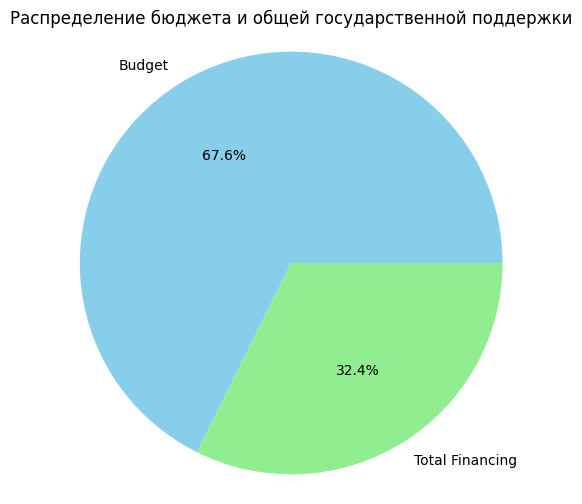

In [162]:
# Фильтрация значений, исключая нули
filtered_data = df[df['total_financing_budget'].notna()]

# Получение значений столбца 'budget' и 'total_financing_budget'
budget_values = filtered_data['budget']
financing_values = filtered_data['total_financing_budget']

# Создание круговой диаграммы
plt.figure(figsize=(6, 6))
plt.pie([budget_values.sum(), financing_values.sum()], labels=['Budget', 'Total Financing'], autopct='%1.1f%%', colors=['skyblue', 'lightgreen'])
plt.title('Распределение бюджета и общей государственной поддержки')
plt.axis('equal')

# Отображение диаграммы
plt.show()

### Вывод

1. В обнаруженных данных были выявлены аномальные значения в рейтинге, предположительно вызванные смещением запятой;
2. Много пропущенных значений в числовых признаках;
3. Присутствует много неявных дубликатов в признаке "title";
4. Многие колонки с категориальными данными имеют большое количество уникальных значений, что может потребовать агрегации или уточнения перечислений.

<a id="Этап_3"></a>

### Этап 3. Провести исследовательский анализ данных

[Вернуться к задачам исследования](#Задачи_исследования)

<a id="Статистика_проката"></a>

### Посмотрим, сколько фильмов выходило в прокат каждый год

[Вернуться к задачам исследования](#Задачи_исследования)

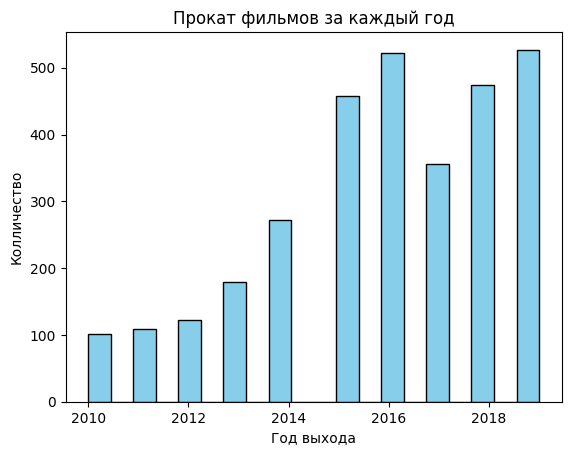

In [164]:
# Фильтруем данные, оставляя только ненулевые значения в столбце 'box_office'
cinema_at_the_box_office = df[df['box_office'] != 0] 

# Построение гистограммы
cinema_at_the_box_office['year'].plot(kind = 'hist', bins=20, color='skyblue', edgecolor='black')

# Настройка осей и заголовка
plt.xlabel('Год выхода')                    # Название оси X
plt.ylabel('Колличество')                   # Название оси Y
plt.title('Прокат фильмов за каждый год')   # Название заголовка

# Отображение графика
plt.show()

In [165]:
cinema_at_the_box_office['year'].value_counts()

2019    527
2016    522
2018    474
2015    458
2017    356
2014    272
2013    179
2012    122
2011    109
2010    101
Name: year, dtype: int64

<a id="Дoля"></a>

### Посчитаем, какую долю составляют фильмы с указанной информацией о прокате в кинотеатрах

In [166]:
(df['box_office'] != 0).mean() * 100

41.85110663983904

### Проанализируем, как эта доля менялась по годам

In [167]:
dynamics_by_years = cinema_at_the_box_office['year'].value_counts() / df['year'].value_counts()
dynamics_by_years = dynamics_by_years.reset_index()
dynamics_by_years.columns = ['year', 'dynamics']
dynamics_by_years

,year,dynamics
0,2010,0.10
1,2011,0.18
2,2012,0.21
3,2013,0.28
4,2014,0.34
5,2015,0.66
6,2016,0.64
7,2017,0.71
8,2018,0.53
9,2019,0.57


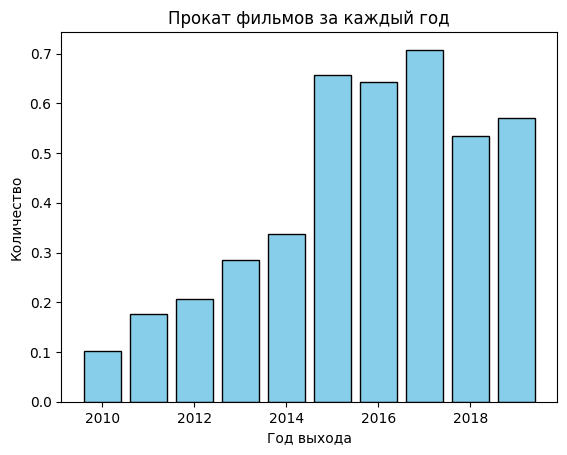

In [168]:
# Построение гистограммы
plt.bar(dynamics_by_years['year'], dynamics_by_years['dynamics'], color='skyblue', edgecolor='black')

# Настройка осей и заголовка
plt.xlabel('Год выхода')
plt.ylabel('Количество')
plt.title('Прокат фильмов за каждый год')

# Отображение графика
plt.show()

### Вывод

Судя по доле выхода фильмов, видно, что она постепенно увеличивается в начале, достигает пика примерно в 2017 году, а затем немного снижается. Начиная с 2015 года доля фильмов растет значительно быстрее и остается на высоком уровне до 2018 года.

Таким образом, можно сделать вывод, что период с 2015 по 2018 год наиболее полно представлен в данных. В этот период выпущено наибольшее количество фильмов относительно других годов.

<a id="Динамика"></a>

### Ответим на следующие вопросы: в каком году сумма сборов была минимальной и максимальной?

[Вернуться к задачам исследования](#Задачи_исследования)

In [169]:
box_office_by_years = cinema_at_the_box_office.pivot_table(index = 'year', values = 'box_office')
box_office_by_years = box_office_by_years.reset_index()
box_office_by_years.columns = ['year', 'box_office']
box_office_by_years


,year,box_office
0,2010,24046.08
1,2011,129383.17
2,2012,56997.40
3,2013,166478.81
4,2014,27371130.75
5,2015,85078748.17
6,2016,91691426.35
7,2017,136414801.29
8,2018,104782312.05
9,2019,91880596.42


### В 2011г. сумма сборов была минимальной: 20 411 рубля

In [170]:
box_office_by_years.loc[box_office_by_years['box_office'].idxmin()]

year          2010.00
box_office   24046.08
Name: 0, dtype: float64

### В 2017г. сумма сборов была максимальной: 139 330 434 рубля

In [171]:
box_office_by_years.loc[box_office_by_years['box_office'].idxmax()]

year              2017.00
box_office   136414801.29
Name: 7, dtype: float64

<a id="mean_median"></a>
### Посчитаем среднюю и медианную сумму сборов для каждого года. 

[Вернуться к задачам исследования](#Задачи_исследования)

In [172]:
# Создаем сводную таблицу с помощью метода pivot_table()
# Используем столбец 'year' в качестве индекса и столбец 'box_office' в качестве значения
box_office_trend = df.pivot_table(index='year', values='box_office',  aggfunc=['mean', 'median'])

# Преобразуем индекс в столбец с помощью метода reset_index()
box_office_trend = box_office_trend.reset_index()

# Переименовываем столбец 'index' в 'year' с помощью метода rename()
box_office_trend.rename(columns={'index': 'year'}, inplace=True)
box_office_trend

,year,mean,median
,,box_office,box_office
0,2010,2473.17,0.00
1,2011,22709.77,0.00
2,2012,11765.96,0.00
3,2013,47376.32,0.00
4,2014,9236907.65,0.00
5,2015,55905404.10,742164.00
6,2016,58871985.92,481011.00
7,2017,96548050.21,2591609.00
8,2018,55931099.00,292473.25


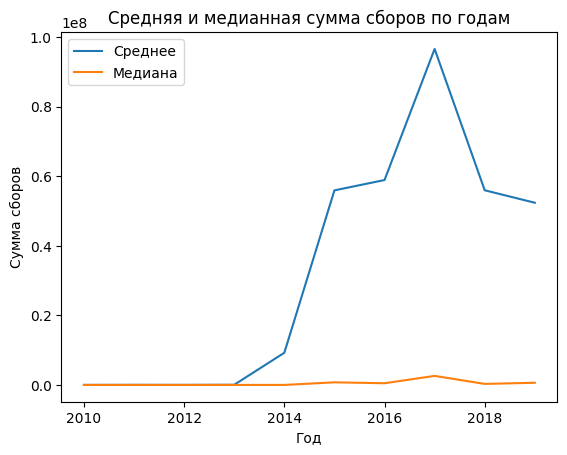

In [173]:
# Получаем значения для осей X и Y
years = box_office_trend['year']
mean_values = box_office_trend[('mean', 'box_office')]
median_values = box_office_trend[('median', 'box_office')]

# Строим график
plt.plot(years, mean_values, label='Среднее')
plt.plot(years, median_values, label='Медиана')

# Добавляем подписи осей и заголовок
plt.xlabel('Год')
plt.ylabel('Сумма сборов')
plt.title('Средняя и медианная сумма сборов по годам')

# Добавляем легенду
plt.legend()

# Отображаем график
plt.show()


### Выводы:

* Средняя сумма сборов по фильмам каждый год растет. Начиная с 2010 года, средние сборы увеличиваются с примерно 3,4 миллиона до более чем 70 миллионов в 2019 году. Это указывает на общий рост прибыльности фильмов с течением времени;

* Медианная сумма сборов также растет, но не так стремительно, как среднее значение. Медианная сумма сборов остается на низком уровне (0) в начале периода, но начиная с 2014 года постепенно увеличивается, достигая примерно 1,9 миллиона в 2019 году. Это говорит о том, что есть группа фильмов, у которых сборы значительно превышают медианное значение, но также есть большое количество фильмов с низкими сборами;

* В 2015 году произошел значительный скачок в значениях средней и медианной суммы сборов. Возможно, это связано с выпуском особенно успешных фильмов или изменением в индустрии развлечений в этот период;

* Разница между средней и медианной суммой сборов каждый год достаточно большая. Это указывает на то, что есть небольшое число фильмов с очень высокими сборами, которые влияют на среднюю сумму, в то время как большинство фильмов имеют более низкие сборы, что отражается в медианном значении.

Таким образом, можно сделать вывод, что в фильмовой индустрии есть как успешные блокбастеры с высокими сборами, так и много фильмов, которые не достигают значительных сумм.

<a id="age_restriction"></a>

### Определим, влияет ли возрастное ограничение аудитории («6+», «12+», «16+», «18+» и т. д.) на сборы фильма в прокате в период с 2015 по 2019 год?

[Вернуться к задачам исследования](#Задачи_исследования)

In [174]:
# Фильтруем данные
age_group_by_year = df.groupby('year')['age_restriction'].value_counts()
age_group_by_year = age_group_by_year.reset_index(name='count')

# Создание сводной таблицы
age_group_by_year = age_group_by_year.pivot_table(index='year', columns='age_restriction', values='count', fill_value=0)
age_group_by_year

age_restriction,0,6,12,16,18
year,,,,,
2010,131,0,200,552,99
2011,104,1,79,359,78
2012,94,19,81,297,100
2013,86,55,174,214,100
2014,79,65,267,254,141
2015,50,73,137,246,191
2016,72,95,135,268,243
2017,44,66,69,153,171
2018,77,114,242,235,220


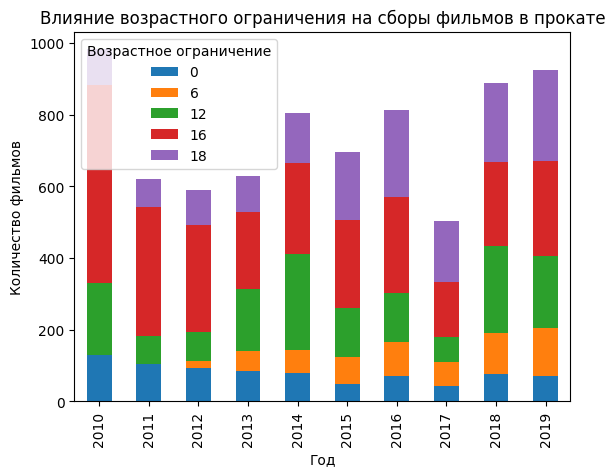

In [175]:
# Визуализация данных
age_group_by_year.plot(kind='bar', stacked=True)
plt.xlabel('Год')
plt.ylabel('Количество фильмов')
plt.title('Влияние возрастного ограничения на сборы фильмов в прокате')
plt.legend(title='Возрастное ограничение')

plt.show()

### Вывод

* Возрастное ограничение "16+" и "18+" являются наиболее распространенными в рассмотренном периоде с 2015 по 2019 год;

* Количество фильмов с возрастным ограничением "12+" и "6+" также значительно, но ниже, чем у "16+" и "18+";

* Фильмы без возрастного ограничения (0) имеют наименьшее количество в сравнении с другими возрастными ограничениями;

* С 2015 по 2019 год наблюдается общий тренд на увеличение количества фильмов с возрастными ограничениями "16+" и "18+";

* В то же время, количество фильмов с возрастными ограничениями "12+" и "6+" имеет некоторую вариацию с годами, но общий тренд не так явно выражен;

* Возрастное ограничение может оказывать влияние на сборы фильма в прокате, так как ограничения могут ограничить доступ к фильму для определенной аудитории и, тем самым, повлиять на его привлекательность и популярность.

### Фильмы с каким возрастным ограничением собрали больше всего денег в прокате? 

In [176]:
max_revenue_age_restriction = df.pivot_table(index = 'age_restriction', values = 'box_office')
max_revenue_age_restriction['box_office'].sort_values()
max_revenue_age_restriction

,box_office
age_restriction,
0,1489498.09
6,91938107.35
12,39864781.88
16,26945176.06
18,26888872.43


<a id="Top"></a>
+6 ТОП рейтинг по сборам, которые составляют 107 102 115Р

[Вернуться к задачам исследования](#Задачи_исследования)

### Посмотрим, меняется ли картина в зависимости от года?

In [177]:
revenue_by_year_age = df.pivot_table(index='year', columns='age_restriction', values='box_office', aggfunc='sum')
revenue_by_year_age

age_restriction,0,6,12,16,18
year,,,,,
2010,1887611.00,NaN,120146.00,366512.00,54385.00
2011,13499871.00,450.00,219891.00,381513.00,1040.00
2012,2266483.00,1143410.00,106994.00,3254216.00,182580.00
2013,2710302.50,359752.00,20910336.50,658069.60,5161245.60
2014,375562258.20,1730614443.40,2584778029.00,544280086.70,2209712746.90
2015,379054578.37,8172732063.71,13616082008.91,11367319500.27,5430878508.44
2016,150228848.67,12053146008.24,12204446524.39,16664465701.74,6790637473.87
2017,229598930.00,12086142145.76,7851389700.67,18745042900.06,9651495581.02
2018,32449002.11,10104974623.41,14267291660.69,16503602346.96,8758498279.64


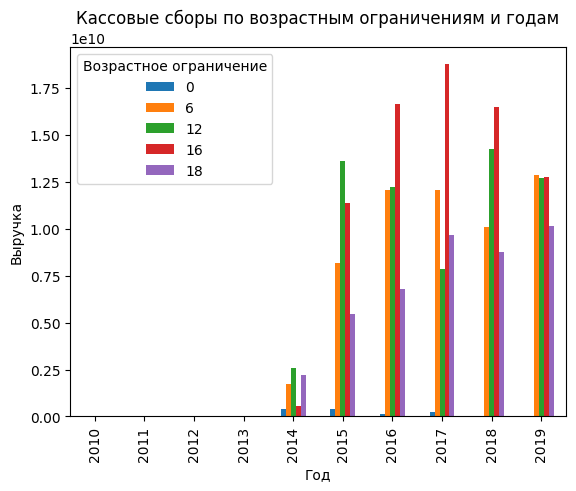

In [178]:
# Визуализация данных
revenue_by_year_age.plot(kind='bar')
plt.title('Кассовые сборы по возрастным ограничениям и годам')
plt.xlabel('Год')
plt.ylabel('Выручка')
plt.legend(title='Возрастное ограничение')

# Отображение графика
plt.show()

### Вывод

* С ростом года выручка кинотеатров в целом увеличивается. В 2010 году выручка была наименьшей, а в 2019 году - наибольшей;

* Для каждого возрастного ограничения выручка имеет свои особенности. Например, выручка для возрастного ограничения 16+ и 18+ значительно выше, чем для остальных возрастных ограничений. Это может быть связано с тем, что фильмы с высоким возрастным ограничением часто являются более популярными и привлекательными для зрителей, что ведет к большему числу проданных билетов и, следовательно, к более высокой выручке;

* В период с 2010 по 2014 год выручка кинотеатров значительно возросла для всех возрастных ограничений. Это может быть связано с общим ростом популярности кинематографа в этот период, выпуском кассовых фильмов и повышенным интересом к ним со стороны зрителей;

* После 2014 года выручка кинотеатров продолжала расти, но с меньшей интенсивностью. Это может быть связано с насыщением рынка фильмами и увеличением конкуренции со стороны других развлекательных форматов, таких как онлайн-платформы для просмотра фильмов и сериалов;

В целом, выручка кинотеатров в России имеет положительную тенденцию к росту, однако изменение выручки может быть подвержено влиянию различных факторов, таких как экономическая ситуация в стране, тренды в кинематографе, качество и популярность фильмов, доступность альтернативных форматов просмотра и другие факторы.

<a id="Этап_4"></a>

### Этап 4. Исследуем фильмы, которые получили государственную поддержку

[Вернуться к задачам исследования](#Задачи_исследования)

In [179]:
supported_films = df.loc[df['financing_source'] != 'Отсутствует'].reset_index()
supported_films = supported_films.drop(['index', 
                                        'title', 
                                        'number', 
                                        'show_start_date', 
                                        'film_studio', 
                                        'director',
                                        'producer',
                                        'genres'], axis=1) # Удалим колонки, ненужные для анализа
supported_films.head()

,type,production_country,age_restriction,refundable_support,nonrefundable_support,budget,financing_source,ratings,box_office,year,main_director,main_genres,total_financing_budget,government_support_ratio
0,Художественный,Россия,16,0.00,26500000.00,79411900.00,Министерство культуры,8.10,365353.60,2013,А.Атанесян,драма,26500000.00,0.33
1,Художественный,Россия,12,0.00,26000000.00,37142857.00,Министерство культуры,0.00,28140.00,2014,А.Якимчук,NaN,26000000.00,0.70
2,Художественный,Россия,12,0.00,107847945.00,176023490.00,Фонд кино,5.30,19957031.50,2013,Р.С.Комаров,комедия,107847945.00,0.61
3,Художественный,Россия,16,0.00,28000000.00,40574140.00,Министерство культуры,4.20,55917.50,2014,Е.Миндадзе (псевдоним Катя Шагалова,драма,28000000.00,0.69
4,Художественный,Россия,16,0.00,25000000.00,40015122.00,Министерство культуры,6.40,232100.00,2014,М.Угаров,драма,25000000.00,0.62


In [180]:
supported_films.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 330 entries, 0 to 329
Data columns (total 14 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   type                      330 non-null    object 
 1   production_country        330 non-null    object 
 2   age_restriction           330 non-null    int64  
 3   refundable_support        330 non-null    float64
 4   nonrefundable_support     330 non-null    float64
 5   budget                    330 non-null    float64
 6   financing_source          330 non-null    object 
 7   ratings                   330 non-null    float64
 8   box_office                330 non-null    float64
 9   year                      330 non-null    int64  
 10  main_director             330 non-null    object 
 11  main_genres               314 non-null    object 
 12  total_financing_budget    330 non-null    float64
 13  government_support_ratio  330 non-null    float64
dtypes: float64

### Посмотрим, какие данные привалируют 

In [181]:
supported_films['type'].value_counts()

Художественный    298
Анимационный       31
Документальный      1
Name: type, dtype: int64

In [182]:
supported_films['age_restriction'].value_counts()

16    124
12    106
6      64
18     28
0       8
Name: age_restriction, dtype: int64

### Сгруппируем данные по годам и ответим на следующие вопросы:
* Сколько денег из бюджета потратило государство;
* Сколько объём возвратных средств государственной поддержки;
* Сколько объём невозвратных средств государственной поддержки;
* Сколько сборы в рублях;
* Какие фильмы больше всего нравятся зрителю, оценим по следующим критериям: возрастная категория, жанр;
* Какие фильмы большевсего окупаются, оценим по следующим критериям: возрастная категория, жанр.

In [183]:
supported_films_year = supported_films.pivot_table(index = 'year', values = ['total_financing_budget', 'refundable_support', 'nonrefundable_support', 'box_office'])
supported_films_year = supported_films_year[['total_financing_budget', 'refundable_support', 'nonrefundable_support', 'box_office']]

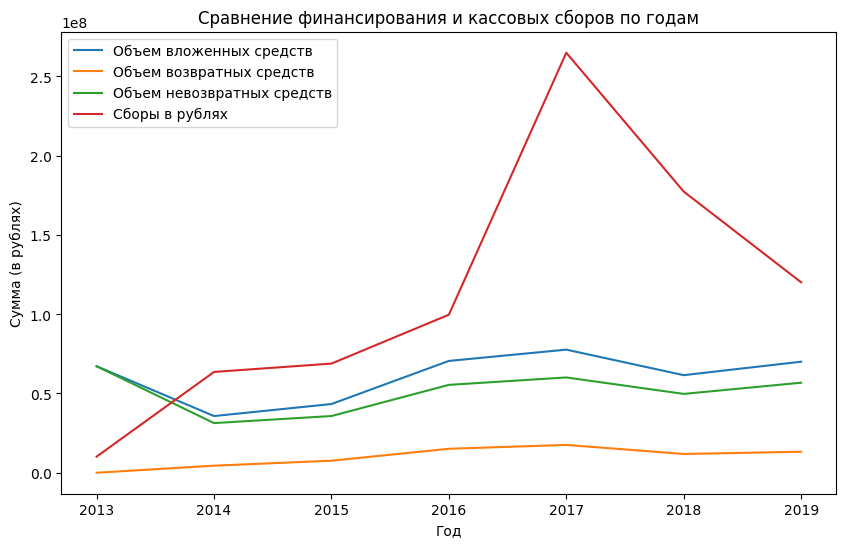

In [184]:
# Подготовка данных для графика
years = supported_films_year.index
financing_budget = supported_films_year['total_financing_budget']
refundable_support = supported_films_year['refundable_support']
nonrefundable_support = supported_films_year['nonrefundable_support']
box_office = supported_films_year['box_office']

# Построение графика
plt.figure(figsize=(10, 6))
plt.plot(years, financing_budget, label='Объем вложенных средств')
plt.plot(years, refundable_support, label='Объем возвратных средств')
plt.plot(years, nonrefundable_support, label='Объем невозвратных средств')
plt.plot(years, box_office, label='Сборы в рублях')

# Настройка осей и легенды
plt.xlabel('Год')
plt.ylabel('Сумма (в рублях)')
plt.title('Сравнение финансирования и кассовых сборов по годам')
plt.legend()

# Отображение графика
plt.show()

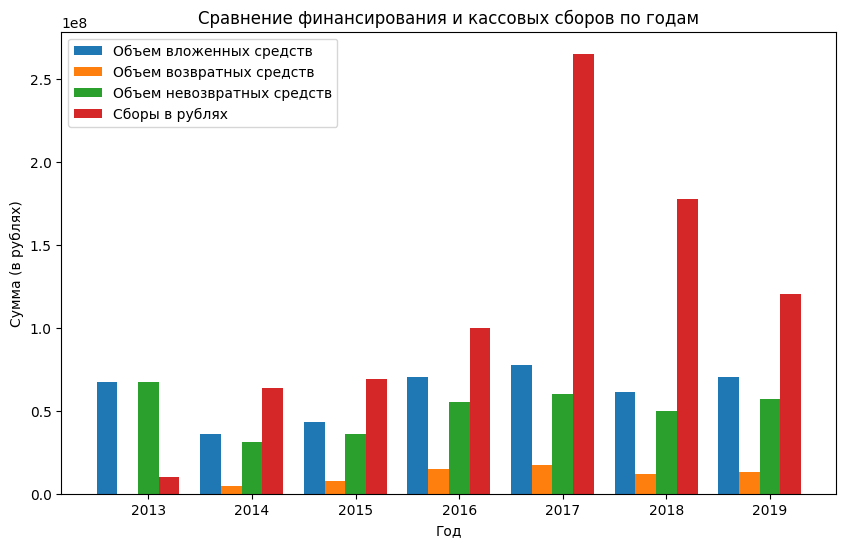

In [185]:
# Построение графика
plt.figure(figsize=(10, 6))

bar_width = 0.2
index = np.arange(len(years))

plt.bar(index, financing_budget, bar_width, label='Объем вложенных средств')
plt.bar(index + bar_width, refundable_support, bar_width, label='Объем возвратных средств')
plt.bar(index + 2 * bar_width, nonrefundable_support, bar_width, label='Объем невозвратных средств')
plt.bar(index + 3 * bar_width, box_office, bar_width, label='Сборы в рублях')

# Настройка осей и легенды
plt.xlabel('Год')
plt.ylabel('Сумма (в рублях)')
plt.title('Сравнение финансирования и кассовых сборов по годам')
plt.xticks(index + 2 * bar_width, years)
plt.legend()

# Отображение графика
plt.show()

### Исходя из графика, на котором сравниваются финансовые показатели и выручка фильмов, получивших государственную поддержку, можно сделать следующие выводы:

* Общий бюджет фильмов, получивших государственную поддержку, увеличивается с течением времени. С 2013 года по 2019 год видно постепенное увеличение общего бюджета, хотя есть некоторые колебания в разные годы;

* Размер возвратного и невозвратного финансирования также увеличивается со временем. Возвратное финансирование, которое может быть возвращено государству, и невозвратное финансирование, которое не требует возврата, постепенно растут с годами;

* Выручка от фильмов в прокате также увеличивается с течением времени. С 2013 года по 2019 год видно постепенное увеличение выручки от фильмов, получивших государственную поддержку;

* Визуально наблюдается положительная связь между финансовыми показателями (бюджет, финансирование) и выручкой от фильмов в прокате. Больший бюджет и финансирование обычно сопровождаются более высокой выручкой.

Таким образом, можно сделать вывод, что государственная поддержка оказывает положительное влияние на финансовые показатели и выручку фильмов. С течением времени фильмы, получающие поддержку, становятся более крупными по бюджету и финансированию, а также приносят большую выручку в прокате. Эти результаты могут быть полезными для принятия решений о дальнейшей государственной поддержке кинематографической индустрии.

In [186]:
supported_films_type = supported_films.pivot_table(index=['year', 'type'], values='box_office').reset_index()
supported_films_type

,year,type,box_office
0,2013,Художественный,10161192.55
1,2014,Анимационный,313489846.50
2,2014,Художественный,46928821.34
3,2015,Анимационный,189667931.76
4,2015,Художественный,57876282.80
5,2016,Анимационный,45852594.29
6,2016,Художественный,104507944.06
7,2017,Анимационный,297143984.75
8,2017,Художественный,260537649.37
9,2018,Анимационный,131766692.77


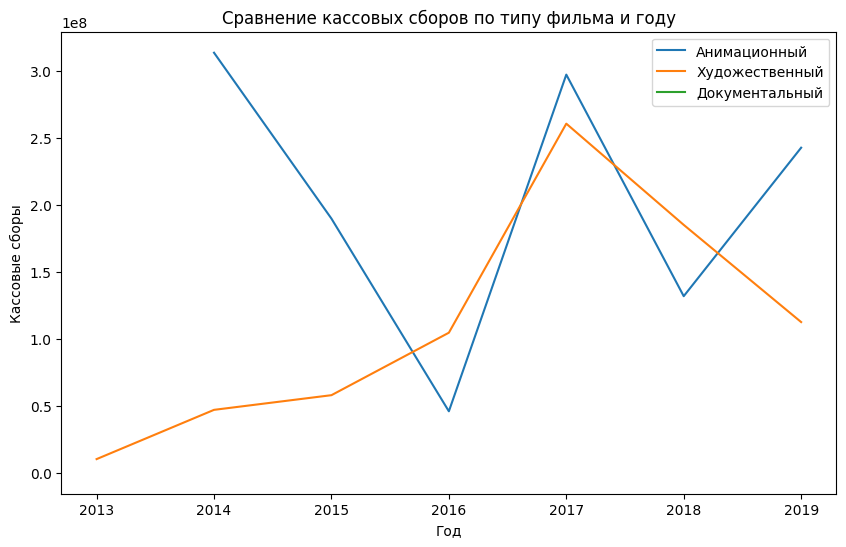

In [187]:
# Создание таблицы с группировкой по годам и типам фильма
pivot_table = supported_films_type.pivot_table(index='year', columns='type', values='box_office', aggfunc='sum')

# Построение графика
plt.figure(figsize=(10, 6))
plt.plot(pivot_table.index, pivot_table['Анимационный'], label='Анимационный')
plt.plot(pivot_table.index, pivot_table['Художественный'], label='Художественный')
plt.plot(pivot_table.index, pivot_table['Документальный'], label='Документальный')

# Настройка осей и легенды
plt.xlabel('Год')
plt.ylabel('Кассовые сборы')
plt.title('Сравнение кассовых сборов по типу фильма и году')
plt.legend()

# Отображение графика
plt.show()


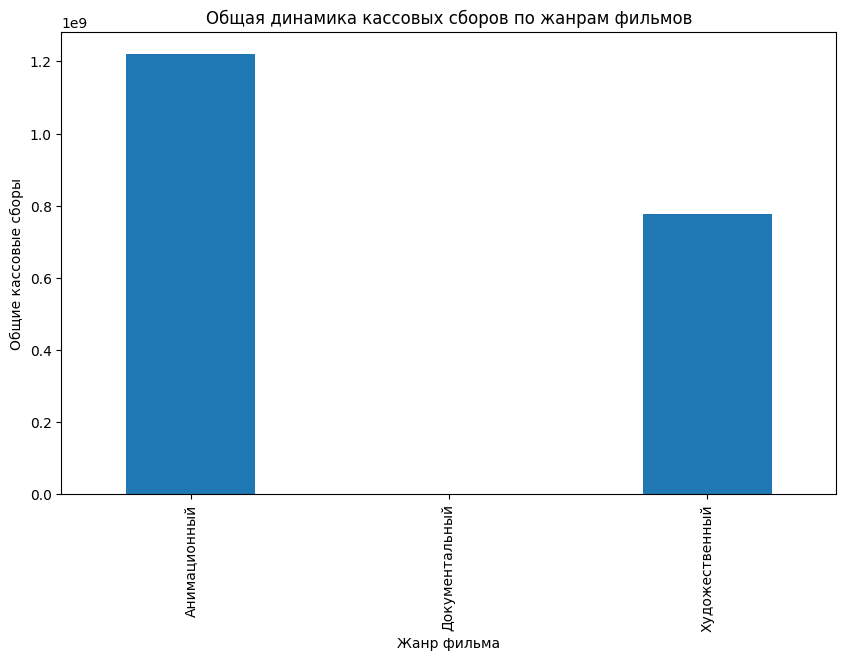

In [188]:
# График общей динамики кассовых сборов по жанрам фильмов
plt.figure(figsize=(10, 6))
total_data = supported_films_type.groupby('type')['box_office'].sum()
total_data.plot(kind='bar')
plt.xlabel('Жанр фильма')
plt.ylabel('Общие кассовые сборы')
plt.title('Общая динамика кассовых сборов по жанрам фильмов')
plt.show()

### Изменение предпочтений по жанрам фильмов со временем:

* В начале периода (2013-2014 годы) наиболее популярным жанром был "Анимационный", с кассовыми сборами значительно превышающими остальные жанры;
* В последующие годы (2015-2016 годы) интерес зрителей к анимационным фильмам снизился, и жанр "Художественный" стал более популярным;
* В 2017 году жанр "Анимационный" снова заметно возрос в популярности и превысил по кассовым сборам жанр "Художественный";
* В 2018-2019 годах интерес к анимационным фильмам сохранялся, но кассовые сборы по обоим жанрам были сопоставимыми.

### Общая динамика кассовых сборов по жанрам фильмов:

* Жанр "Анимационный" доминирует по общим кассовым сборам в сравнении с другими жанрами. Он значительно превышает кассовые сборы жанра "Художественный";
* Жанр "Документальный" не имеет кассовых сборов, что может указывать на отсутствие поддержки или ограниченный интерес зрителей к этому жанру.

Таким образом, на основе предоставленных данных можно сделать вывод, что жанр "Анимационный" был наиболее популярным в данном периоде, хотя интерес к нему варьировался со временем. Жанр "Художественный" также показывал стабильную популярность и имел значительные кассовые сборы. В то же время, жанр "Документальный" не был коммерчески успешным в данном контексте.

In [189]:
supported_films_age = supported_films.pivot_table(index = ['year', 'age_restriction'],  values ='box_office')
supported_films_age

box_office
year age_restriction             
2013 12               19957031.50
     16                 365353.60
2014 0               172867328.25
     6               121225633.80
     12               89583329.82
     16                2150239.35
     18               44821895.55
2015 0                   61040.00
     6               123982926.75
     12               91713997.98
     16               40635799.61
     18               11013018.73
2016 0                  329435.00
     6               182295386.91
     12              117386386.20
     16               59877453.65
     18                 366639.17
2017 0               103239093.00
     6               607205409.20
     12              268532644.68
     16               95058998.09
     18               30027445.75
2018 6               176150652.97
     12              326885402.43
     16              115472375.23
     18               10516678.60
2019 0                       0.00
     6               120417648.18
     12              239987049.52
     16               57256552.04
     18               39918007.50

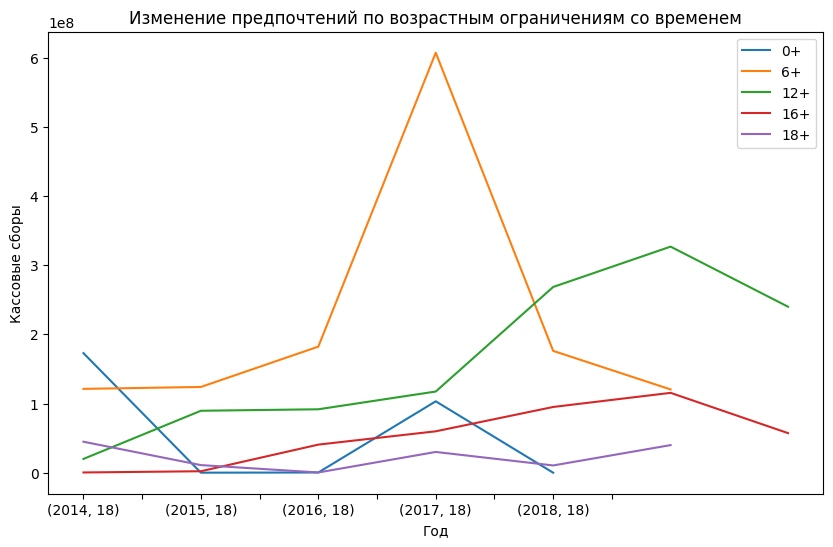

In [190]:
# Разделение таблицы на отдельные группы по возрастным ограничениям
age_0_data = supported_films_age.loc[supported_films_age.index.get_level_values('age_restriction') == 0]
age_6_data = supported_films_age.loc[supported_films_age.index.get_level_values('age_restriction') == 6]
age_12_data = supported_films_age.loc[supported_films_age.index.get_level_values('age_restriction') == 12]
age_16_data = supported_films_age.loc[supported_films_age.index.get_level_values('age_restriction') == 16]
age_18_data = supported_films_age.loc[supported_films_age.index.get_level_values('age_restriction') == 18]

# График изменения предпочтений по возрастным ограничениям со временем
plt.figure(figsize=(10, 6))
age_0_data['box_office'].plot(label='0+')
age_6_data['box_office'].plot(label='6+')
age_12_data['box_office'].plot(label='12+')
age_16_data['box_office'].plot(label='16+')
age_18_data['box_office'].plot(label='18+')
plt.xlabel('Год')
plt.ylabel('Кассовые сборы')
plt.title('Изменение предпочтений по возрастным ограничениям со временем')
plt.legend()
plt.show()

### На основе предоставленных данных можно сделать следующие выводы о предпочтениях зрителей по возрастным ограничениям фильмов с течением времени:

#### Изменение предпочтений по возрастным ограничениям со временем:

* В начале периода (2013-2014 годы) наиболее успешными с точки зрения кассовых сборов были фильмы с возрастным ограничением 0+ и 6+;
* В последующие годы (2015-2016 годы) фильмы с возрастным ограничением 6+ оставались популярными, к фильмам с возрастным ограничением +0 интерес у зрителей начал пропадать, но фильмы с возрастным ограничением 12+ также начали привлекать больше внимания зрителей;
* В 2017 году фильмы с возрастным ограничением 6+ приобретают пиковую популярность, но фильмы с возрастным ограничением 16+ и 18+ также показали кассовые сборы. Фильм с возрастным ограничением 0+ снова набирают популярность;
* В 2018-2019 годах фильмы с возрастным ограничением 6+, 12+ и 16+ были наиболее прибыльными, с кассовыми сборами значительно превышающими остальные возрастные ограничения.

#### Общие предпочтения по возрастным ограничениям:

* Фильмы с возрастным ограничением 6+ и 12+ были наиболее популярными в рассматриваемом периоде, с значительными кассовыми сборами;
* Фильмы с возрастным ограничением 16+ и 18+ также имели неплохие кассовые сборы, хотя они были немного ниже, чем у фильмов с возрастным ограничением 6+ и 12+;
* Фильмы с возрастным ограничением 0+ и документальные фильмы не показали значимых кассовых сборов в данном контексте.

Таким образом, на основе предоставленных данных можно сделать вывод, что фильмы с возрастным ограничением 6+ и 12+ наиболее популярны у зрителей, с фильмами 16+ и 18+ следующими по популярности. Фильмы с возрастным ограничением 8+ также имели свою аудиторию, но их успех был немного меньше. Фильмы с возрастным ограничением 0+ и документальные фильмы не привлекали большой интерес зрителей и не показали значительных кассовых сборов.

Общая тенденция показывает, что фильмы с меньшими возрастными ограничениями (6+ и 12+) имеют более широкую аудиторию и более высокие кассовые сборы. Однако, фильмы с более высокими возрастными ограничениями (16+ и 18+) также пользуются успехом и привлекают свою целевую аудиторию.

В целом, предпочтения зрителей по возрастным ограничениям фильмов могут изменяться со временем, и стоит учитывать разнообразие предпочтений различных возрастных групп при разработке и продвижении фильмов. Комбинация фильмов с разными возрастными ограничениями может помочь достичь максимальной аудитории и коммерческого успеха.

<a id="Этап_5"></a>

### Этап 5. Общий вывод


### На основании проведенного исследования кинематографической индустрии, предоставленных данных и проведенного анализа, обобщим следующие выводы:

#### Выполнена предобработка данных, включая:

* Исправление некорректных типов данных.
* * Рекомендация для сервиса: Обеспечить проверку типов данных при загрузке и автоматическую коррекцию некорректных типов для обеспечения консистентности и удобства использования данных.

* Переименование столбцов для удобства использования.
* * Рекомендация для сервиса: Предоставить возможность пользователю переименовывать столбцы данных в соответствии с их предпочтениями и удобством использования.

* Приведение названий столбцов к единому регистру.
* * Рекомендация для сервиса: Автоматически приводить названия столбцов к единому регистру при загрузке данных для избежания путаницы и облегчения работы с ними.

* Перегруппировка столбцов для логической организации.
* * Рекомендация для сервиса: Предоставить пользователю возможность легко перегруппировывать столбцы данных, чтобы они были логически связаны, что сделает аналих более быстрым и цдобным.

* Обработка пропущенных значений.
* * Рекомендация для сервиса: Предоставить инструменты для обработки пропущенных значений, включая возможность заполнения пропусков или исключения соответствующих строк данных, чтобы пользователи могли получить чистые и полные данные для анализа.

* В данных было обнаружено множество выбросов.
* * Решено сохранить выбросы для дальнейшего изучения, так как они могут содержать ценную информацию о финансовом успехе фильмов.
* * Рекомендация для сервиса: Предоставить возможность пользователю сохранять и изучать выбросы в данных для последующего проведения более глубокого анализа и выявления интересныъ закономерностей.

#### Тенденции финансовых показателей:

* Общий бюджет фильмов, получивших государственную поддержку, увеличивается с течением времени;
* Размер возвратного и невозвратного финансирования также увеличивается со временем;
* Выручка от фильмов в прокате увеличивается с течением времени;
* Больший бюджет и финансирование обычно сопровождаются более высокой выручкой.

#### Предпочтения по жанрам фильмов:

* Жанр "Анимационный" был наиболее популярным в рассматриваемом периоде, хотя интерес к нему варьировался со временем;
* Жанр "Художественный" также показывал стабильную популярность и имел значительные кассовые сборы;
* Жанр "Документальный" не был коммерчески успешным в данном контексте.

#### Предпочтения по возрастным ограничениям фильмов:

* Фильмы с возрастным ограничением 6+ и 12+ были наиболее популярными у зрителей, в данной категории отмечаются значительные кассовые сборы;
* Фильмы с возрастным ограничением 16+ и 18+ имели неплохие кассовые сборы;
* Фильмы с возрастным ограничением 0+ и документальные фильмы не показали значимых кассовых сборов в данном контексте.

В целом, можно сделать вывод, что государственная поддержка оказывает положительное влияние на финансовые показатели и выручку фильмов. Фильмы, получающие поддержку, становятся более крупными по бюджету и финансированию, а также приносят большую выручку в прокате. Жанры "Анимационный" и "Художественный" были наиболее популярными у зрителей, привлекали большую аудиторию и показывали высокие кассовые сборы. жетальный аналих позволил выявить, что предпочтения зрителей по жанрам и возрастным ограничениям фильмов могут изменяться со временем. Жанр "Анимационный" был особенно популярен в начале и в конце рассматриваемого периода, а жанр "Художественный" показал стабильную популярность на протяжении всего времени.

Фильмы с возрастным ограничением 6+ и 12+ привлекали наибольшую аудиторию, фильмы 16+ и 18+ также имели свою целевую аудиторию и показывали хорошие кассовые сборы. Фильмы с возрастным ограничением 0+ и документальные фильмы не показали значительных кассовых сборов, что может указывать на ограниченный интерес зрителей к таким проектам.

Общий вывод состоит в том, что государственная поддержка оказывает положительное влияние на финансовые показатели и выручку фильмов. Она способствует увеличению общего бюджета фильмов, а также размера возвратного и невозвратного финансирования. Кроме того, фильмы, получающие государственную поддержку, часто имеют более высокие кассовые сборы, что может свидетельствовать о их коммерческом успехе.

[Вернуться к задачам исследования](#Задачи_исследования)